In [1]:
"""
Alperen Görmez
Jan 16, 2020
"""

'\nAlperen Görmez\nJan 16, 2020\n'

In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
teamIndex = {}

teamIndex["ArsenalFC"] = 0
teamIndex["AFCBournemouth"] = 1
teamIndex["Brighton&HoveAlbion"] = 2
teamIndex["BurnleyFC"] = 3
teamIndex["ChelseaFC"] = 4
teamIndex["CrystalPalace"] = 5
teamIndex["EvertonFC"] = 6
teamIndex["HuddersfieldTown"] = 7
teamIndex["LeicesterCity"] = 8
teamIndex["LiverpoolFC"] = 9
teamIndex["ManchesterCity"] = 10
teamIndex["ManchesterUnited"] = 11
teamIndex["NewcastleUnited"] = 12
teamIndex["SouthamptonFC"] = 13
teamIndex["StokeCity"] = 14
teamIndex["SwanseaCity"] = 15
teamIndex["TottenhamHotspur"] = 16
teamIndex["WatfordFC"] = 17
teamIndex["WestBromwichAlbion"] = 18
teamIndex["WestHamUnited"] = 19

teamResults = {}
# 0: history of goals scored at home
# 1: history of goals conceded at home
# 2: history of goals conceded at away
# 3: history of goals scored at away
# 4: history of goals scored
# 5: history of goals conceded
numFeatures = 6

teamResults["ArsenalFC"] = [ [] for i in range( numFeatures) ]
teamResults["AFCBournemouth"] = [ [] for i in range( numFeatures) ]
teamResults["Brighton&HoveAlbion"] = [ [] for i in range( numFeatures) ]
teamResults["BurnleyFC"] = [ [] for i in range( numFeatures) ]
teamResults["ChelseaFC"] = [ [] for i in range( numFeatures) ]
teamResults["CrystalPalace"] = [ [] for i in range( numFeatures) ]
teamResults["EvertonFC"] = [ [] for i in range( numFeatures) ]
teamResults["HuddersfieldTown"] = [ [] for i in range( numFeatures) ]
teamResults["LeicesterCity"] = [ [] for i in range( numFeatures) ]
teamResults["LiverpoolFC"] = [ [] for i in range( numFeatures) ]
teamResults["ManchesterCity"] = [ [] for i in range( numFeatures) ]
teamResults["ManchesterUnited"] = [ [] for i in range( numFeatures) ]
teamResults["NewcastleUnited"] = [ [] for i in range( numFeatures) ]
teamResults["SouthamptonFC"] = [ [] for i in range( numFeatures) ]
teamResults["StokeCity"] = [ [] for i in range( numFeatures) ]
teamResults["SwanseaCity"] = [ [] for i in range( numFeatures) ]
teamResults["TottenhamHotspur"] = [ [] for i in range( numFeatures) ]
teamResults["WatfordFC"] = [ [] for i in range( numFeatures) ]
teamResults["WestBromwichAlbion"] = [ [] for i in range( numFeatures) ]
teamResults["WestHamUnited"] = [ [] for i in range( numFeatures) ]

In [4]:
# read the raw data
f = open('epl1718.txt', "r")
lines = f.readlines()
f.close()

In [5]:
data = np.zeros((380,52)) # 38 weeks = 380 matches, 2*6 + 20 + 20 = 52 features
label = np.zeros((380,))

In [6]:
matchNo = 0
for line in lines:
    if (line == "\n") or ("Matchday" in line):
        pass
    else:
        line = line.replace(" ", "") # remove spaces
        line = line.replace("\n", "") # remove \n character
        
        m = re.search(r"\d", line) # search an integer in the line
        i = m.start() # the index of first integer in the line
        
        homeTeamName = line[:i]
        homeTeamScore = int( line[i])
        awayTeamName = line[i+3:]
        awayTeamScore = int( line[i+2])
        
        
        """
        add the current result to the teamResults
        """      
        
        teamResults[ homeTeamName][0].append( homeTeamScore)
        teamResults[ homeTeamName][1].append( awayTeamScore)
        #teamResults[ homeTeamName][2].append( )
        #teamResults[ homeTeamName][3].append( )
        teamResults[ homeTeamName][4].append( homeTeamScore)
        teamResults[ homeTeamName][5].append( awayTeamScore)
        
        #teamResults[ awayTeamName][0].append( )
        #teamResults[ awayTeamName][1].append( )
        teamResults[ awayTeamName][2].append( homeTeamScore)
        teamResults[ awayTeamName][3].append( awayTeamScore)
        teamResults[ awayTeamName][4].append( awayTeamScore)
        teamResults[ awayTeamName][5].append( homeTeamScore)
        

        """
        add the current result to the dataset
        """
        # for home team
        # avg. goals scored at home
        # avg. goals conceded at home
        # avg. goals conceded at away
        # avg. goals scored at away
        # avg. goals scored at last 5 matches
        # avg. goals conceded at last 5 matches
        
        # for away team
        # avg. goals scored at home
        # avg. goals conceded at home
        # avg. goals conceded at away
        # avg. goals scored at away
        # avg. goals scored at last 5 matches
        # avg. goals conceded at last 5 matches
        
        # which team is home, which team is away
        
        
        data[matchNo][ 0] = np.mean( teamResults[ homeTeamName][0])
        data[matchNo][ 1] = np.mean( teamResults[ homeTeamName][1])
        data[matchNo][ 2] = np.mean( teamResults[ homeTeamName][2])
        data[matchNo][ 3] = np.mean( teamResults[ homeTeamName][3])
        
        if len( teamResults[ homeTeamName][4]) >= 5:
            data[matchNo][ 4] = np.sum( teamResults[ homeTeamName][4][-5:]) / 5.0
        else:
            data[matchNo][ 4] = np.sum( teamResults[ homeTeamName][4][-5:]) / len( teamResults[ homeTeamName][4])
        
        if len( teamResults[ homeTeamName][5]) >= 5:
            data[matchNo][ 5] = np.sum( teamResults[ homeTeamName][5][-5:]) / 5.0
        else:
            data[matchNo][ 5] = np.sum( teamResults[ homeTeamName][5][-5:]) / len( teamResults[ homeTeamName][5])

            
        
        data[matchNo][ 6] = np.mean( teamResults[ awayTeamName][0])
        data[matchNo][ 7] = np.mean( teamResults[ awayTeamName][1])
        data[matchNo][ 8] = np.mean( teamResults[ awayTeamName][2])
        data[matchNo][ 9] = np.mean( teamResults[ awayTeamName][3])
        
        if len( teamResults[ awayTeamName][4]) >= 5:
            data[matchNo][ 10] = np.sum( teamResults[ awayTeamName][4][-5:]) / 5.0
        else:
            data[matchNo][ 10] = np.sum( teamResults[ awayTeamName][4][-5:]) / len( teamResults[ awayTeamName][4])
        
        if len( teamResults[ homeTeamName][5]) >= 5:
            data[matchNo][ 11] = np.sum( teamResults[ awayTeamName][5][-5:]) / 5.0
        else:
            data[matchNo][ 11] = np.sum( teamResults[ awayTeamName][5][-5:]) / len( teamResults[ awayTeamName][5])
        
        
        homeTeamIndex = teamIndex[ homeTeamName]
        awayTeamIndex = teamIndex[ awayTeamName]
        
        data[matchNo][12+homeTeamIndex] = 1.0
        data[matchNo][32+awayTeamIndex] = 1.0
        
        label[ matchNo] = ( (homeTeamScore + awayTeamScore) >= 2.5 )
        
        matchNo += 1

data = np.nan_to_num(data) # to handle division by 0's when no away games are played for example

C:\Users\Alperen\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Alperen\Anaconda3\envs\tf_gpu\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


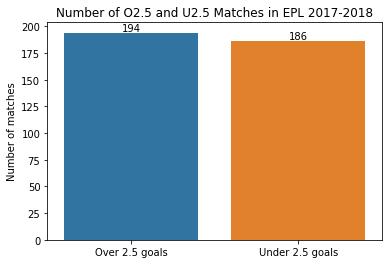

In [7]:
o = label[label == 1.]
u = label[label == 0.]

g = sns.barplot( ["Over 2.5 goals", "Under 2.5 goals"], [len(o), len(u)])

for p in g.patches:
    g.annotate( format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Number of O2.5 and U2.5 Matches in EPL 2017-2018')
plt.ylabel('Number of matches')
plt.show()

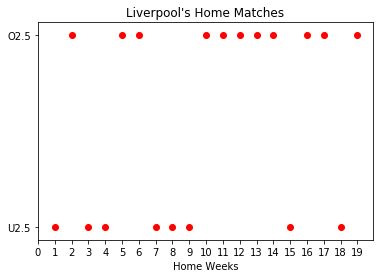

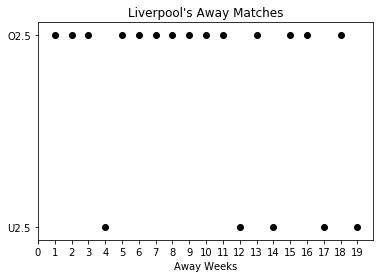

In [8]:
liv_homeMatches = np.empty([19])
weekNumbers = np.arange(1,20)
for weekNo in weekNumbers:
    liv_homeMatches[weekNo-1] = (teamResults["LiverpoolFC"][0][weekNo-1] + teamResults["LiverpoolFC"][1][weekNo-1]) >= 2.5

liv_awayMatches = np.empty([19])
weekNumbers = np.arange(1,20)
for weekNo in weekNumbers:
    liv_awayMatches[weekNo-1] = (teamResults["LiverpoolFC"][2][weekNo-1] + teamResults["LiverpoolFC"][3][weekNo-1]) >= 2.5


plt.scatter( weekNumbers, liv_homeMatches, c="r")
plt.xlabel("Home Weeks")
plt.title("Liverpool's Home Matches")
plt.xticks(np.arange(20))
plt.yticks(np.arange(2), ("U2.5", "O2.5"))
plt.show()

plt.scatter( weekNumbers, liv_awayMatches, c="k")
plt.xlabel("Away Weeks")
plt.title("Liverpool's Away Matches")
plt.xticks(np.arange(20))
plt.yticks(np.arange(2), ("U2.5", "O2.5"))
plt.show()

In [9]:
# discard first 5 weeks
garbage_data = data[:10*5][:]
garbage_label = label[:10*5]

# weeks 6-23 are training data (18 matches for each team)
x_train = data[10*5:10*23][:]
y_train = label[10*5:10*23]

# weeks 24-30 are validation data (7 matches for each team)
x_val = data[10*23:10*30][:]
y_val = label[10*23:10*30]

# weeks 31-38 are test data (8 matches for each team)
x_test = data[10*30:][:]
y_test = label[10*30:]

In [15]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add( layers.Dense(28, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dropout(0.1))
model.add( layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 180 samples, validate on 70 samples
Epoch 1/100
180/180 [==============================] - 0s 3ms/step - loss: 0.7819 - acc: 0.4778 - val_loss: 0.7517 - val_acc: 0.5143
Epoch 2/100
180/180 [==============================] - 0s 100us/step - loss: 0.7409 - acc: 0.5611 - val_loss: 0.7468 - val_acc: 0.5143
Epoch 3/100
180/180 [==============================] - 0s 89us/step - loss: 0.7451 - acc: 0.5333 - val_loss: 0.7447 - val_acc: 0.5429
Epoch 4/100
180/180 [==============================] - 0s 89us/step - loss: 0.7334 - acc: 0.5389 - val_loss: 0.7448 - val_acc: 0.4714
Epoch 5/100
180/180 [==============================] - 0s 89us/step - loss: 0.7316 - acc: 0.6000 - val_loss: 0.7450 - val_acc: 0.4857
Epoch 6/100
180/180 [==============================] - 0s 83us/step - loss: 0.7316 - acc: 0.5667 - val_loss: 0.7452 - val_acc: 0.4857
Epoch 7/100
180/180 [==============================] - 0s 100us/step - loss: 0.7207 - acc: 0.6056 - val_loss: 0.7446 - val_acc: 0.4714
Epoch 8/100
180/

180/180 [==============================] - 0s 78us/step - loss: 0.5845 - acc: 0.7556 - val_loss: 0.7149 - val_acc: 0.5857
Epoch 62/100
180/180 [==============================] - 0s 83us/step - loss: 0.5976 - acc: 0.7556 - val_loss: 0.7097 - val_acc: 0.6429
Epoch 63/100
180/180 [==============================] - 0s 78us/step - loss: 0.5795 - acc: 0.7722 - val_loss: 0.7161 - val_acc: 0.6000
Epoch 64/100
180/180 [==============================] - 0s 78us/step - loss: 0.5697 - acc: 0.7556 - val_loss: 0.7086 - val_acc: 0.6429
Epoch 65/100
180/180 [==============================] - 0s 72us/step - loss: 0.5852 - acc: 0.7444 - val_loss: 0.7087 - val_acc: 0.6429
Epoch 66/100
180/180 [==============================] - 0s 78us/step - loss: 0.5659 - acc: 0.7722 - val_loss: 0.7129 - val_acc: 0.6429
Epoch 67/100
180/180 [==============================] - 0s 78us/step - loss: 0.5624 - acc: 0.7889 - val_loss: 0.7118 - val_acc: 0.6286
Epoch 68/100
180/180 [==============================] - 0s 83us/step

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                1484      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 1,905
Trainable params: 1,905
Non-trainable params: 0
_________________________________________________________________


In [12]:
%matplotlib inline

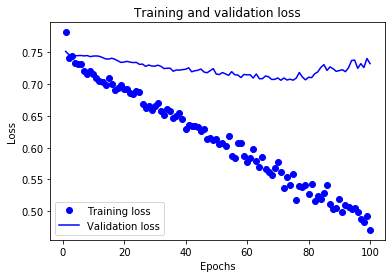

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

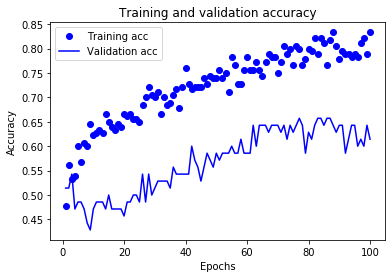

In [18]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add( layers.Dense(28, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dropout(0.1))
model.add( layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add( layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=80,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 1s 5ms/step - loss: 0.7656 - acc: 0.5222 - val_loss: 0.7230 - val_acc: 0.5857
Epoch 2/80
180/180 [==============================] - 0s 94us/step - loss: 0.7384 - acc: 0.5889 - val_loss: 0.7187 - val_acc: 0.6143
Epoch 3/80
180/180 [==============================] - 0s 88us/step - loss: 0.7305 - acc: 0.5611 - val_loss: 0.7180 - val_acc: 0.6714
Epoch 4/80
180/180 [==============================] - 0s 94us/step - loss: 0.7288 - acc: 0.5444 - val_loss: 0.7167 - val_acc: 0.6714
Epoch 5/80
180/180 [==============================] - 0s 89us/step - loss: 0.7203 - acc: 0.5833 - val_loss: 0.7161 - val_acc: 0.6286
Epoch 6/80
180/180 [==============================] - 0s 100us/step - loss: 0.7304 - acc: 0.5667 - val_loss: 0.7168 - val_acc: 0.6000
Epoch 7/80
180/180 [==============================] - 0s 94us/step - loss: 0.7124 - acc: 0.5889 - val_loss: 0.7137 - val_acc: 0.6429
Epoch 8/80
180/180 [====

Epoch 62/80
180/180 [==============================] - 0s 83us/step - loss: 0.5783 - acc: 0.7444 - val_loss: 0.6889 - val_acc: 0.6143
Epoch 63/80
180/180 [==============================] - 0s 100us/step - loss: 0.5734 - acc: 0.7667 - val_loss: 0.6866 - val_acc: 0.6000
Epoch 64/80
180/180 [==============================] - 0s 94us/step - loss: 0.5599 - acc: 0.8222 - val_loss: 0.6877 - val_acc: 0.6000
Epoch 65/80
180/180 [==============================] - 0s 83us/step - loss: 0.5644 - acc: 0.7944 - val_loss: 0.6890 - val_acc: 0.6000
Epoch 66/80
180/180 [==============================] - 0s 78us/step - loss: 0.5722 - acc: 0.7611 - val_loss: 0.6872 - val_acc: 0.6000
Epoch 67/80
180/180 [==============================] - 0s 78us/step - loss: 0.5600 - acc: 0.7889 - val_loss: 0.7020 - val_acc: 0.6286
Epoch 68/80
180/180 [==============================] - 0s 100us/step - loss: 0.5425 - acc: 0.7889 - val_loss: 0.7002 - val_acc: 0.6286
Epoch 69/80
180/180 [==============================] - 0s 78

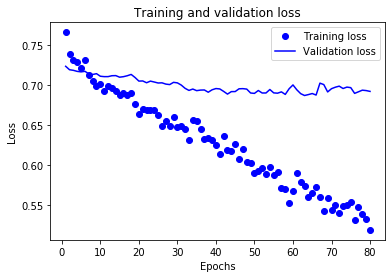

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

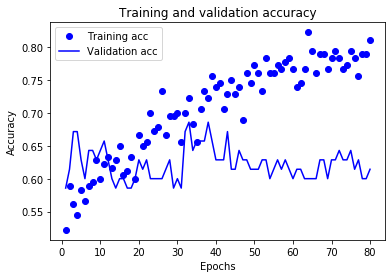

In [22]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
model.evaluate( x_test, y_test)

80/80 [==============================] - 0s 124us/step


[0.6672247648239136, 0.6375]

In [23]:
test_set_acc = []
for i in range( 100):
    model = models.Sequential()
    model.add( layers.Dense(28, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add( layers.Dropout(0.1))
    model.add( layers.Dense(14, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add( layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train,
                        y_train,
                        epochs=80,
                        batch_size=128,
                        validation_data=(x_val, y_val))
    test_set_acc.append( model.evaluate( x_test, y_test)[1])

Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 1s 5ms/step - loss: 0.7399 - acc: 0.5278 - val_loss: 0.7527 - val_acc: 0.5429
Epoch 2/80
180/180 [==============================] - 0s 83us/step - loss: 0.7242 - acc: 0.5389 - val_loss: 0.7539 - val_acc: 0.5286
Epoch 3/80
180/180 [==============================] - 0s 89us/step - loss: 0.7269 - acc: 0.5556 - val_loss: 0.7491 - val_acc: 0.5286
Epoch 4/80
180/180 [==============================] - 0s 88us/step - loss: 0.7130 - acc: 0.5667 - val_loss: 0.7502 - val_acc: 0.5571
Epoch 5/80
180/180 [==============================] - 0s 100us/step - loss: 0.7121 - acc: 0.5667 - val_loss: 0.7472 - val_acc: 0.5571
Epoch 6/80
180/180 [==============================] - 0s 94us/step - loss: 0.7223 - acc: 0.5667 - val_loss: 0.7415 - val_acc: 0.5429
Epoch 7/80
180/180 [==============================] - 0s 100us/step - loss: 0.7141 - acc: 0.5778 - val_loss: 0.7392 - val_acc: 0.5571
Epoch 8/80
180/180 [===

Epoch 62/80
180/180 [==============================] - 0s 89us/step - loss: 0.5596 - acc: 0.7944 - val_loss: 0.6938 - val_acc: 0.6000
Epoch 63/80
180/180 [==============================] - 0s 94us/step - loss: 0.5477 - acc: 0.8111 - val_loss: 0.6943 - val_acc: 0.6000
Epoch 64/80
180/180 [==============================] - 0s 89us/step - loss: 0.5450 - acc: 0.7889 - val_loss: 0.7046 - val_acc: 0.6143
Epoch 65/80
180/180 [==============================] - 0s 78us/step - loss: 0.5564 - acc: 0.7500 - val_loss: 0.6997 - val_acc: 0.6286
Epoch 66/80
180/180 [==============================] - 0s 83us/step - loss: 0.5535 - acc: 0.7833 - val_loss: 0.7054 - val_acc: 0.6143
Epoch 67/80
180/180 [==============================] - 0s 83us/step - loss: 0.5315 - acc: 0.8167 - val_loss: 0.7054 - val_acc: 0.6286
Epoch 68/80
180/180 [==============================] - 0s 78us/step - loss: 0.5282 - acc: 0.7833 - val_loss: 0.6950 - val_acc: 0.6000
Epoch 69/80
180/180 [==============================] - 0s 83us

180/180 [==============================] - 0s 83us/step - loss: 0.6488 - acc: 0.6778 - val_loss: 0.7054 - val_acc: 0.5714
Epoch 43/80
180/180 [==============================] - 0s 83us/step - loss: 0.6295 - acc: 0.7278 - val_loss: 0.7104 - val_acc: 0.6000
Epoch 44/80
180/180 [==============================] - 0s 89us/step - loss: 0.6266 - acc: 0.7056 - val_loss: 0.7024 - val_acc: 0.5571
Epoch 45/80
180/180 [==============================] - 0s 83us/step - loss: 0.6335 - acc: 0.7278 - val_loss: 0.7027 - val_acc: 0.5429
Epoch 46/80
180/180 [==============================] - 0s 78us/step - loss: 0.6297 - acc: 0.7333 - val_loss: 0.6991 - val_acc: 0.5571
Epoch 47/80
180/180 [==============================] - 0s 83us/step - loss: 0.6203 - acc: 0.7444 - val_loss: 0.7053 - val_acc: 0.5714
Epoch 48/80
180/180 [==============================] - 0s 83us/step - loss: 0.6158 - acc: 0.7389 - val_loss: 0.7110 - val_acc: 0.6143
Epoch 49/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 83us/step - loss: 0.6923 - acc: 0.6611 - val_loss: 0.7261 - val_acc: 0.5714
Epoch 23/80
180/180 [==============================] - 0s 89us/step - loss: 0.6842 - acc: 0.6333 - val_loss: 0.7255 - val_acc: 0.5571
Epoch 24/80
180/180 [==============================] - 0s 94us/step - loss: 0.6883 - acc: 0.6556 - val_loss: 0.7243 - val_acc: 0.5714
Epoch 25/80
180/180 [==============================] - 0s 83us/step - loss: 0.6771 - acc: 0.7000 - val_loss: 0.7290 - val_acc: 0.5143
Epoch 26/80
180/180 [==============================] - 0s 83us/step - loss: 0.6837 - acc: 0.6333 - val_loss: 0.7271 - val_acc: 0.5571
Epoch 27/80
180/180 [==============================] - 0s 82us/step - loss: 0.6781 - acc: 0.6944 - val_loss: 0.7261 - val_acc: 0.5429
Epoch 28/80
180/180 [==============================] - 0s 83us/step - loss: 0.6959 - acc: 0.6111 - val_loss: 0.7292 - val_acc: 0.5143
Epoch 29/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 77us/step - loss: 0.7309 - acc: 0.5500 - val_loss: 0.7289 - val_acc: 0.5429
Epoch 3/80
180/180 [==============================] - 0s 83us/step - loss: 0.7293 - acc: 0.5889 - val_loss: 0.7290 - val_acc: 0.5286
Epoch 4/80
180/180 [==============================] - 0s 83us/step - loss: 0.7192 - acc: 0.5722 - val_loss: 0.7288 - val_acc: 0.5571
Epoch 5/80
180/180 [==============================] - 0s 89us/step - loss: 0.7096 - acc: 0.5778 - val_loss: 0.7248 - val_acc: 0.5571
Epoch 6/80
180/180 [==============================] - 0s 88us/step - loss: 0.7107 - acc: 0.5611 - val_loss: 0.7179 - val_acc: 0.6143
Epoch 7/80
180/180 [==============================] - 0s 88us/step - loss: 0.7164 - acc: 0.5444 - val_loss: 0.7146 - val_acc: 0.5571
Epoch 8/80
180/180 [==============================] - 0s 83us/step - loss: 0.7209 - acc: 0.5500 - val_loss: 0.7113 - val_acc: 0.5714
Epoch 9/80
180/180 [==============================] - 0s 83us/step - loss: 0.715

Epoch 63/80
180/180 [==============================] - 0s 116us/step - loss: 0.5373 - acc: 0.7722 - val_loss: 0.6841 - val_acc: 0.6286
Epoch 64/80
180/180 [==============================] - 0s 111us/step - loss: 0.5383 - acc: 0.7611 - val_loss: 0.6728 - val_acc: 0.6429
Epoch 65/80
180/180 [==============================] - 0s 105us/step - loss: 0.5383 - acc: 0.7611 - val_loss: 0.6720 - val_acc: 0.6429
Epoch 66/80
180/180 [==============================] - 0s 133us/step - loss: 0.5293 - acc: 0.8000 - val_loss: 0.6789 - val_acc: 0.6143
Epoch 67/80
180/180 [==============================] - 0s 111us/step - loss: 0.5316 - acc: 0.7556 - val_loss: 0.6825 - val_acc: 0.6286
Epoch 68/80
180/180 [==============================] - 0s 105us/step - loss: 0.5276 - acc: 0.8167 - val_loss: 0.6837 - val_acc: 0.6286
Epoch 69/80
180/180 [==============================] - 0s 94us/step - loss: 0.5237 - acc: 0.8000 - val_loss: 0.6798 - val_acc: 0.6143
Epoch 70/80
180/180 [==============================] - 0

180/180 [==============================] - 0s 100us/step - loss: 0.6592 - acc: 0.6556 - val_loss: 0.6939 - val_acc: 0.6143
Epoch 44/80
180/180 [==============================] - 0s 116us/step - loss: 0.6436 - acc: 0.6500 - val_loss: 0.6895 - val_acc: 0.6286
Epoch 45/80
180/180 [==============================] - 0s 89us/step - loss: 0.6346 - acc: 0.7000 - val_loss: 0.6901 - val_acc: 0.6143
Epoch 46/80
180/180 [==============================] - 0s 78us/step - loss: 0.6409 - acc: 0.6667 - val_loss: 0.6869 - val_acc: 0.6000
Epoch 47/80
180/180 [==============================] - 0s 78us/step - loss: 0.6323 - acc: 0.7000 - val_loss: 0.6849 - val_acc: 0.6000
Epoch 48/80
180/180 [==============================] - 0s 205us/step - loss: 0.6205 - acc: 0.7389 - val_loss: 0.6834 - val_acc: 0.6143
Epoch 49/80
180/180 [==============================] - 0s 144us/step - loss: 0.6247 - acc: 0.7167 - val_loss: 0.6809 - val_acc: 0.6000
Epoch 50/80
180/180 [==============================] - 0s 105us/step -

180/180 [==============================] - 0s 83us/step - loss: 0.6751 - acc: 0.6167 - val_loss: 0.7068 - val_acc: 0.5857
Epoch 24/80
180/180 [==============================] - 0s 78us/step - loss: 0.6860 - acc: 0.6278 - val_loss: 0.7080 - val_acc: 0.5571
Epoch 25/80
180/180 [==============================] - 0s 89us/step - loss: 0.6732 - acc: 0.6167 - val_loss: 0.7031 - val_acc: 0.5714
Epoch 26/80
180/180 [==============================] - 0s 78us/step - loss: 0.6765 - acc: 0.6444 - val_loss: 0.6980 - val_acc: 0.5714
Epoch 27/80
180/180 [==============================] - 0s 78us/step - loss: 0.6765 - acc: 0.6111 - val_loss: 0.6989 - val_acc: 0.5857
Epoch 28/80
180/180 [==============================] - 0s 78us/step - loss: 0.6864 - acc: 0.6333 - val_loss: 0.6988 - val_acc: 0.6429
Epoch 29/80
180/180 [==============================] - 0s 83us/step - loss: 0.6744 - acc: 0.6667 - val_loss: 0.6989 - val_acc: 0.6143
Epoch 30/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 78us/step - loss: 0.7451 - acc: 0.5056 - val_loss: 0.7788 - val_acc: 0.4571
Epoch 4/80
180/180 [==============================] - 0s 94us/step - loss: 0.7349 - acc: 0.5611 - val_loss: 0.7777 - val_acc: 0.4714
Epoch 5/80
180/180 [==============================] - 0s 83us/step - loss: 0.7346 - acc: 0.5556 - val_loss: 0.7727 - val_acc: 0.4857
Epoch 6/80
180/180 [==============================] - 0s 83us/step - loss: 0.7372 - acc: 0.5167 - val_loss: 0.7722 - val_acc: 0.4714
Epoch 7/80
180/180 [==============================] - 0s 89us/step - loss: 0.7219 - acc: 0.5778 - val_loss: 0.7707 - val_acc: 0.4714
Epoch 8/80
180/180 [==============================] - 0s 78us/step - loss: 0.7229 - acc: 0.5389 - val_loss: 0.7659 - val_acc: 0.5000
Epoch 9/80
180/180 [==============================] - 0s 78us/step - loss: 0.7212 - acc: 0.5833 - val_loss: 0.7646 - val_acc: 0.5000
Epoch 10/80
180/180 [==============================] - 0s 83us/step - loss: 0.71

180/180 [==============================] - 0s 83us/step - loss: 0.5692 - acc: 0.7722 - val_loss: 0.7227 - val_acc: 0.6143
Epoch 65/80
180/180 [==============================] - 0s 83us/step - loss: 0.5431 - acc: 0.8056 - val_loss: 0.7197 - val_acc: 0.6286
Epoch 66/80
180/180 [==============================] - 0s 83us/step - loss: 0.5746 - acc: 0.7667 - val_loss: 0.7228 - val_acc: 0.6143
Epoch 67/80
180/180 [==============================] - 0s 83us/step - loss: 0.5575 - acc: 0.8056 - val_loss: 0.7184 - val_acc: 0.6000
Epoch 68/80
180/180 [==============================] - 0s 78us/step - loss: 0.5696 - acc: 0.7556 - val_loss: 0.7191 - val_acc: 0.6000
Epoch 69/80
180/180 [==============================] - 0s 78us/step - loss: 0.5508 - acc: 0.7667 - val_loss: 0.7207 - val_acc: 0.6143
Epoch 70/80
180/180 [==============================] - 0s 83us/step - loss: 0.5499 - acc: 0.8056 - val_loss: 0.7319 - val_acc: 0.6000
Epoch 71/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 83us/step - loss: 0.6419 - acc: 0.7056 - val_loss: 0.7602 - val_acc: 0.5571
Epoch 45/80
180/180 [==============================] - 0s 89us/step - loss: 0.6283 - acc: 0.7111 - val_loss: 0.7568 - val_acc: 0.5571
Epoch 46/80
180/180 [==============================] - 0s 89us/step - loss: 0.6342 - acc: 0.7056 - val_loss: 0.7489 - val_acc: 0.5714
Epoch 47/80
180/180 [==============================] - 0s 94us/step - loss: 0.6398 - acc: 0.6611 - val_loss: 0.7564 - val_acc: 0.5571
Epoch 48/80
180/180 [==============================] - 0s 116us/step - loss: 0.6229 - acc: 0.7222 - val_loss: 0.7493 - val_acc: 0.5714
Epoch 49/80
180/180 [==============================] - 0s 111us/step - loss: 0.6105 - acc: 0.7000 - val_loss: 0.7645 - val_acc: 0.5429
Epoch 50/80
180/180 [==============================] - 0s 100us/step - loss: 0.5961 - acc: 0.7389 - val_loss: 0.7617 - val_acc: 0.5429
Epoch 51/80
180/180 [==============================] - 0s 100us/step - 

180/180 [==============================] - 0s 83us/step - loss: 0.6807 - acc: 0.6444 - val_loss: 0.7208 - val_acc: 0.5143
Epoch 25/80
180/180 [==============================] - 0s 89us/step - loss: 0.6746 - acc: 0.6333 - val_loss: 0.7206 - val_acc: 0.5143
Epoch 26/80
180/180 [==============================] - 0s 83us/step - loss: 0.6652 - acc: 0.6833 - val_loss: 0.7166 - val_acc: 0.5286
Epoch 27/80
180/180 [==============================] - 0s 77us/step - loss: 0.6771 - acc: 0.6667 - val_loss: 0.7161 - val_acc: 0.5143
Epoch 28/80
180/180 [==============================] - 0s 78us/step - loss: 0.6584 - acc: 0.6944 - val_loss: 0.7167 - val_acc: 0.5143
Epoch 29/80
180/180 [==============================] - 0s 78us/step - loss: 0.6593 - acc: 0.6944 - val_loss: 0.7168 - val_acc: 0.5143
Epoch 30/80
180/180 [==============================] - 0s 83us/step - loss: 0.6536 - acc: 0.7389 - val_loss: 0.7178 - val_acc: 0.5000
Epoch 31/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 94us/step - loss: 0.7905 - acc: 0.4722 - val_loss: 0.7544 - val_acc: 0.4429
Epoch 5/80
180/180 [==============================] - 0s 83us/step - loss: 0.7771 - acc: 0.4222 - val_loss: 0.7515 - val_acc: 0.4143
Epoch 6/80
180/180 [==============================] - 0s 89us/step - loss: 0.7607 - acc: 0.4944 - val_loss: 0.7494 - val_acc: 0.4000
Epoch 7/80
180/180 [==============================] - 0s 77us/step - loss: 0.7428 - acc: 0.5278 - val_loss: 0.7489 - val_acc: 0.5143
Epoch 8/80
180/180 [==============================] - 0s 83us/step - loss: 0.7477 - acc: 0.5111 - val_loss: 0.7494 - val_acc: 0.5286
Epoch 9/80
180/180 [==============================] - 0s 78us/step - loss: 0.7426 - acc: 0.5389 - val_loss: 0.7486 - val_acc: 0.5286
Epoch 10/80
180/180 [==============================] - 0s 83us/step - loss: 0.7287 - acc: 0.5611 - val_loss: 0.7472 - val_acc: 0.5429
Epoch 11/80
180/180 [==============================] - 0s 94us/step - loss: 0.7

180/180 [==============================] - 0s 89us/step - loss: 0.5984 - acc: 0.7222 - val_loss: 0.7179 - val_acc: 0.6000
Epoch 66/80
180/180 [==============================] - 0s 89us/step - loss: 0.5879 - acc: 0.7500 - val_loss: 0.7169 - val_acc: 0.5857
Epoch 67/80
180/180 [==============================] - 0s 89us/step - loss: 0.6033 - acc: 0.6944 - val_loss: 0.7151 - val_acc: 0.5857
Epoch 68/80
180/180 [==============================] - 0s 72us/step - loss: 0.5911 - acc: 0.7278 - val_loss: 0.7172 - val_acc: 0.5857
Epoch 69/80
180/180 [==============================] - 0s 78us/step - loss: 0.5822 - acc: 0.7667 - val_loss: 0.7206 - val_acc: 0.5857
Epoch 70/80
180/180 [==============================] - 0s 83us/step - loss: 0.5752 - acc: 0.7833 - val_loss: 0.7175 - val_acc: 0.5857
Epoch 71/80
180/180 [==============================] - 0s 89us/step - loss: 0.5855 - acc: 0.7611 - val_loss: 0.7245 - val_acc: 0.5857
Epoch 72/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 105us/step - loss: 0.6337 - acc: 0.6889 - val_loss: 0.6910 - val_acc: 0.6000
Epoch 46/80
180/180 [==============================] - 0s 100us/step - loss: 0.6315 - acc: 0.7111 - val_loss: 0.6887 - val_acc: 0.6000
Epoch 47/80
180/180 [==============================] - 0s 100us/step - loss: 0.6306 - acc: 0.7444 - val_loss: 0.6922 - val_acc: 0.6143
Epoch 48/80
180/180 [==============================] - 0s 100us/step - loss: 0.6260 - acc: 0.6944 - val_loss: 0.6934 - val_acc: 0.6000
Epoch 49/80
180/180 [==============================] - 0s 89us/step - loss: 0.6292 - acc: 0.6944 - val_loss: 0.6931 - val_acc: 0.6000
Epoch 50/80
180/180 [==============================] - 0s 78us/step - loss: 0.6234 - acc: 0.7056 - val_loss: 0.6867 - val_acc: 0.6143
Epoch 51/80
180/180 [==============================] - 0s 78us/step - loss: 0.6190 - acc: 0.7333 - val_loss: 0.6854 - val_acc: 0.6286
Epoch 52/80
180/180 [==============================] - 0s 83us/step - 

180/180 [==============================] - 0s 94us/step - loss: 0.6605 - acc: 0.6889 - val_loss: 0.7220 - val_acc: 0.5286
Epoch 26/80
180/180 [==============================] - 0s 94us/step - loss: 0.6576 - acc: 0.7000 - val_loss: 0.7187 - val_acc: 0.5000
Epoch 27/80
180/180 [==============================] - 0s 89us/step - loss: 0.6576 - acc: 0.7167 - val_loss: 0.7122 - val_acc: 0.5429
Epoch 28/80
180/180 [==============================] - 0s 83us/step - loss: 0.6521 - acc: 0.7222 - val_loss: 0.7137 - val_acc: 0.5286
Epoch 29/80
180/180 [==============================] - 0s 83us/step - loss: 0.6500 - acc: 0.7167 - val_loss: 0.7043 - val_acc: 0.5714
Epoch 30/80
180/180 [==============================] - 0s 83us/step - loss: 0.6413 - acc: 0.7111 - val_loss: 0.7066 - val_acc: 0.5714
Epoch 31/80
180/180 [==============================] - 0s 83us/step - loss: 0.6243 - acc: 0.7444 - val_loss: 0.7104 - val_acc: 0.5429
Epoch 32/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 94us/step - loss: 0.7206 - acc: 0.5500 - val_loss: 0.7269 - val_acc: 0.5000
Epoch 6/80
180/180 [==============================] - 0s 89us/step - loss: 0.7169 - acc: 0.5944 - val_loss: 0.7267 - val_acc: 0.5000
Epoch 7/80
180/180 [==============================] - 0s 94us/step - loss: 0.7184 - acc: 0.5667 - val_loss: 0.7268 - val_acc: 0.5000
Epoch 8/80
180/180 [==============================] - 0s 94us/step - loss: 0.7035 - acc: 0.5667 - val_loss: 0.7228 - val_acc: 0.5000
Epoch 9/80
180/180 [==============================] - 0s 83us/step - loss: 0.7059 - acc: 0.5611 - val_loss: 0.7216 - val_acc: 0.5000
Epoch 10/80
180/180 [==============================] - 0s 83us/step - loss: 0.7159 - acc: 0.5611 - val_loss: 0.7189 - val_acc: 0.5143
Epoch 11/80
180/180 [==============================] - 0s 83us/step - loss: 0.6976 - acc: 0.5556 - val_loss: 0.7178 - val_acc: 0.5143
Epoch 12/80
180/180 [==============================] - 0s 89us/step - loss: 0.

180/180 [==============================] - 0s 83us/step - loss: 0.5832 - acc: 0.7889 - val_loss: 0.6486 - val_acc: 0.7143
Epoch 67/80
180/180 [==============================] - 0s 83us/step - loss: 0.5820 - acc: 0.7444 - val_loss: 0.6455 - val_acc: 0.6857
Epoch 68/80
180/180 [==============================] - 0s 83us/step - loss: 0.5855 - acc: 0.7611 - val_loss: 0.6455 - val_acc: 0.7000
Epoch 69/80
180/180 [==============================] - 0s 83us/step - loss: 0.5688 - acc: 0.8111 - val_loss: 0.6464 - val_acc: 0.7000
Epoch 70/80
180/180 [==============================] - 0s 78us/step - loss: 0.5675 - acc: 0.7556 - val_loss: 0.6454 - val_acc: 0.6857
Epoch 71/80
180/180 [==============================] - 0s 83us/step - loss: 0.5774 - acc: 0.8000 - val_loss: 0.6467 - val_acc: 0.7000
Epoch 72/80
180/180 [==============================] - 0s 83us/step - loss: 0.5776 - acc: 0.7944 - val_loss: 0.6445 - val_acc: 0.7000
Epoch 73/80
180/180 [==============================] - 0s 89us/step - loss

180/180 [==============================] - 0s 89us/step - loss: 0.6251 - acc: 0.6833 - val_loss: 0.7081 - val_acc: 0.6143
Epoch 47/80
180/180 [==============================] - 0s 91us/step - loss: 0.6232 - acc: 0.7556 - val_loss: 0.7139 - val_acc: 0.6000
Epoch 48/80
180/180 [==============================] - 0s 78us/step - loss: 0.6247 - acc: 0.7222 - val_loss: 0.7066 - val_acc: 0.6143
Epoch 49/80
180/180 [==============================] - 0s 89us/step - loss: 0.6147 - acc: 0.7444 - val_loss: 0.7036 - val_acc: 0.6143
Epoch 50/80
180/180 [==============================] - 0s 83us/step - loss: 0.6094 - acc: 0.7611 - val_loss: 0.7064 - val_acc: 0.6143
Epoch 51/80
180/180 [==============================] - 0s 83us/step - loss: 0.6155 - acc: 0.7222 - val_loss: 0.7056 - val_acc: 0.6000
Epoch 52/80
180/180 [==============================] - 0s 83us/step - loss: 0.5990 - acc: 0.7222 - val_loss: 0.7093 - val_acc: 0.6429
Epoch 53/80
180/180 [==============================] - 0s 97us/step - loss

180/180 [==============================] - 0s 94us/step - loss: 0.6660 - acc: 0.6333 - val_loss: 0.7217 - val_acc: 0.5571
Epoch 27/80
180/180 [==============================] - 0s 83us/step - loss: 0.6713 - acc: 0.6389 - val_loss: 0.7155 - val_acc: 0.5714
Epoch 28/80
180/180 [==============================] - 0s 89us/step - loss: 0.6738 - acc: 0.6556 - val_loss: 0.7166 - val_acc: 0.5571
Epoch 29/80
180/180 [==============================] - 0s 78us/step - loss: 0.6601 - acc: 0.6722 - val_loss: 0.7148 - val_acc: 0.5571
Epoch 30/80
180/180 [==============================] - 0s 83us/step - loss: 0.6654 - acc: 0.6556 - val_loss: 0.7179 - val_acc: 0.5571
Epoch 31/80
180/180 [==============================] - 0s 78us/step - loss: 0.6628 - acc: 0.6611 - val_loss: 0.7210 - val_acc: 0.5571
Epoch 32/80
180/180 [==============================] - 0s 89us/step - loss: 0.6657 - acc: 0.6556 - val_loss: 0.7192 - val_acc: 0.5571
Epoch 33/80
180/180 [==============================] - 0s 89us/step - loss

180/180 [==============================] - 0s 89us/step - loss: 0.7325 - acc: 0.5667 - val_loss: 0.7435 - val_acc: 0.5286
Epoch 7/80
180/180 [==============================] - 0s 89us/step - loss: 0.7399 - acc: 0.5500 - val_loss: 0.7429 - val_acc: 0.5429
Epoch 8/80
180/180 [==============================] - 0s 83us/step - loss: 0.7274 - acc: 0.5944 - val_loss: 0.7422 - val_acc: 0.5286
Epoch 9/80
180/180 [==============================] - 0s 94us/step - loss: 0.7241 - acc: 0.5778 - val_loss: 0.7410 - val_acc: 0.5571
Epoch 10/80
180/180 [==============================] - 0s 83us/step - loss: 0.7004 - acc: 0.6722 - val_loss: 0.7427 - val_acc: 0.5286
Epoch 11/80
180/180 [==============================] - 0s 89us/step - loss: 0.7089 - acc: 0.6222 - val_loss: 0.7437 - val_acc: 0.5571
Epoch 12/80
180/180 [==============================] - 0s 94us/step - loss: 0.7170 - acc: 0.5889 - val_loss: 0.7435 - val_acc: 0.5429
Epoch 13/80
180/180 [==============================] - 0s 78us/step - loss: 0

180/180 [==============================] - 0s 78us/step - loss: 0.5762 - acc: 0.7611 - val_loss: 0.6925 - val_acc: 0.6000
Epoch 68/80
180/180 [==============================] - 0s 89us/step - loss: 0.5579 - acc: 0.7889 - val_loss: 0.7027 - val_acc: 0.5714
Epoch 69/80
180/180 [==============================] - 0s 83us/step - loss: 0.5603 - acc: 0.7611 - val_loss: 0.6933 - val_acc: 0.6000
Epoch 70/80
180/180 [==============================] - 0s 83us/step - loss: 0.5540 - acc: 0.7611 - val_loss: 0.6881 - val_acc: 0.6000
Epoch 71/80
180/180 [==============================] - 0s 83us/step - loss: 0.5551 - acc: 0.8000 - val_loss: 0.6897 - val_acc: 0.6000
Epoch 72/80
180/180 [==============================] - 0s 83us/step - loss: 0.5594 - acc: 0.8000 - val_loss: 0.6896 - val_acc: 0.6000
Epoch 73/80
180/180 [==============================] - 0s 89us/step - loss: 0.5500 - acc: 0.7778 - val_loss: 0.6961 - val_acc: 0.6000
Epoch 74/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 105us/step - loss: 0.6485 - acc: 0.7111 - val_loss: 0.7172 - val_acc: 0.5429
Epoch 48/80
180/180 [==============================] - 0s 105us/step - loss: 0.6421 - acc: 0.7111 - val_loss: 0.7189 - val_acc: 0.5571
Epoch 49/80
180/180 [==============================] - 0s 100us/step - loss: 0.6399 - acc: 0.7167 - val_loss: 0.7229 - val_acc: 0.5000
Epoch 50/80
180/180 [==============================] - 0s 94us/step - loss: 0.6389 - acc: 0.7000 - val_loss: 0.7214 - val_acc: 0.5000
Epoch 51/80
180/180 [==============================] - 0s 100us/step - loss: 0.6409 - acc: 0.6833 - val_loss: 0.7166 - val_acc: 0.5429
Epoch 52/80
180/180 [==============================] - 0s 105us/step - loss: 0.6202 - acc: 0.7222 - val_loss: 0.7134 - val_acc: 0.5857
Epoch 53/80
180/180 [==============================] - 0s 100us/step - loss: 0.6292 - acc: 0.7222 - val_loss: 0.7177 - val_acc: 0.5000
Epoch 54/80
180/180 [==============================] - 0s 122us/step

180/180 [==============================] - 0s 83us/step - loss: 0.6954 - acc: 0.6056 - val_loss: 0.7248 - val_acc: 0.5429
Epoch 28/80
180/180 [==============================] - 0s 83us/step - loss: 0.6927 - acc: 0.6222 - val_loss: 0.7252 - val_acc: 0.5429
Epoch 29/80
180/180 [==============================] - 0s 94us/step - loss: 0.6911 - acc: 0.6056 - val_loss: 0.7229 - val_acc: 0.5143
Epoch 30/80
180/180 [==============================] - 0s 89us/step - loss: 0.6818 - acc: 0.6556 - val_loss: 0.7215 - val_acc: 0.5286
Epoch 31/80
180/180 [==============================] - 0s 78us/step - loss: 0.6808 - acc: 0.6278 - val_loss: 0.7196 - val_acc: 0.5429
Epoch 32/80
180/180 [==============================] - 0s 83us/step - loss: 0.6737 - acc: 0.6444 - val_loss: 0.7175 - val_acc: 0.5571
Epoch 33/80
180/180 [==============================] - 0s 83us/step - loss: 0.6716 - acc: 0.7056 - val_loss: 0.7160 - val_acc: 0.6143
Epoch 34/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 83us/step - loss: 0.7164 - acc: 0.5611 - val_loss: 0.7398 - val_acc: 0.5000
Epoch 8/80
180/180 [==============================] - 0s 83us/step - loss: 0.7232 - acc: 0.5278 - val_loss: 0.7392 - val_acc: 0.5000
Epoch 9/80
180/180 [==============================] - 0s 89us/step - loss: 0.7170 - acc: 0.5667 - val_loss: 0.7357 - val_acc: 0.5143
Epoch 10/80
180/180 [==============================] - 0s 83us/step - loss: 0.7101 - acc: 0.5667 - val_loss: 0.7332 - val_acc: 0.5143
Epoch 11/80
180/180 [==============================] - 0s 88us/step - loss: 0.7118 - acc: 0.5500 - val_loss: 0.7316 - val_acc: 0.5143
Epoch 12/80
180/180 [==============================] - 0s 83us/step - loss: 0.7145 - acc: 0.5667 - val_loss: 0.7291 - val_acc: 0.5286
Epoch 13/80
180/180 [==============================] - 0s 89us/step - loss: 0.7033 - acc: 0.5611 - val_loss: 0.7282 - val_acc: 0.5429
Epoch 14/80
180/180 [==============================] - 0s 83us/step - loss: 

180/180 [==============================] - 0s 83us/step - loss: 0.5744 - acc: 0.7778 - val_loss: 0.6965 - val_acc: 0.6000
Epoch 69/80
180/180 [==============================] - 0s 94us/step - loss: 0.5808 - acc: 0.7444 - val_loss: 0.6974 - val_acc: 0.6000
Epoch 70/80
180/180 [==============================] - 0s 94us/step - loss: 0.5758 - acc: 0.7611 - val_loss: 0.6930 - val_acc: 0.6286
Epoch 71/80
180/180 [==============================] - 0s 100us/step - loss: 0.5701 - acc: 0.7889 - val_loss: 0.6922 - val_acc: 0.6429
Epoch 72/80
180/180 [==============================] - 0s 94us/step - loss: 0.5663 - acc: 0.7722 - val_loss: 0.6992 - val_acc: 0.6143
Epoch 73/80
180/180 [==============================] - 0s 105us/step - loss: 0.5776 - acc: 0.7278 - val_loss: 0.6963 - val_acc: 0.6143
Epoch 74/80
180/180 [==============================] - 0s 111us/step - loss: 0.5661 - acc: 0.7944 - val_loss: 0.7074 - val_acc: 0.5714
Epoch 75/80
180/180 [==============================] - 0s 94us/step - l

180/180 [==============================] - 0s 100us/step - loss: 0.6669 - acc: 0.6556 - val_loss: 0.7298 - val_acc: 0.5286
Epoch 49/80
180/180 [==============================] - 0s 100us/step - loss: 0.6794 - acc: 0.6000 - val_loss: 0.7302 - val_acc: 0.5571
Epoch 50/80
180/180 [==============================] - 0s 89us/step - loss: 0.6746 - acc: 0.6056 - val_loss: 0.7305 - val_acc: 0.5714
Epoch 51/80
180/180 [==============================] - 0s 83us/step - loss: 0.6721 - acc: 0.6056 - val_loss: 0.7310 - val_acc: 0.5714
Epoch 52/80
180/180 [==============================] - 0s 89us/step - loss: 0.6592 - acc: 0.6222 - val_loss: 0.7286 - val_acc: 0.5571
Epoch 53/80
180/180 [==============================] - 0s 83us/step - loss: 0.6628 - acc: 0.6389 - val_loss: 0.7280 - val_acc: 0.5286
Epoch 54/80
180/180 [==============================] - 0s 78us/step - loss: 0.6583 - acc: 0.6333 - val_loss: 0.7294 - val_acc: 0.5429
Epoch 55/80
180/180 [==============================] - 0s 83us/step - lo

180/180 [==============================] - 0s 89us/step - loss: 0.6742 - acc: 0.6444 - val_loss: 0.7070 - val_acc: 0.6000
Epoch 29/80
180/180 [==============================] - 0s 83us/step - loss: 0.6677 - acc: 0.6944 - val_loss: 0.7061 - val_acc: 0.6000
Epoch 30/80
180/180 [==============================] - 0s 83us/step - loss: 0.6645 - acc: 0.6611 - val_loss: 0.7035 - val_acc: 0.6286
Epoch 31/80
180/180 [==============================] - 0s 86us/step - loss: 0.6710 - acc: 0.6444 - val_loss: 0.7066 - val_acc: 0.5714
Epoch 32/80
180/180 [==============================] - 0s 78us/step - loss: 0.6661 - acc: 0.6556 - val_loss: 0.7036 - val_acc: 0.6143
Epoch 33/80
180/180 [==============================] - 0s 89us/step - loss: 0.6528 - acc: 0.6833 - val_loss: 0.7045 - val_acc: 0.5857
Epoch 34/80
180/180 [==============================] - 0s 83us/step - loss: 0.6723 - acc: 0.6389 - val_loss: 0.7022 - val_acc: 0.5714
Epoch 35/80
180/180 [==============================] - 0s 78us/step - loss

180/180 [==============================] - 0s 83us/step - loss: 0.7467 - acc: 0.4833 - val_loss: 0.7559 - val_acc: 0.5143
Epoch 9/80
180/180 [==============================] - 0s 89us/step - loss: 0.7234 - acc: 0.5444 - val_loss: 0.7486 - val_acc: 0.5286
Epoch 10/80
180/180 [==============================] - 0s 89us/step - loss: 0.7262 - acc: 0.5500 - val_loss: 0.7486 - val_acc: 0.5143
Epoch 11/80
180/180 [==============================] - 0s 94us/step - loss: 0.7133 - acc: 0.5444 - val_loss: 0.7492 - val_acc: 0.5286
Epoch 12/80
180/180 [==============================] - 0s 95us/step - loss: 0.7258 - acc: 0.5389 - val_loss: 0.7426 - val_acc: 0.5571
Epoch 13/80
180/180 [==============================] - 0s 100us/step - loss: 0.7235 - acc: 0.5556 - val_loss: 0.7396 - val_acc: 0.5714
Epoch 14/80
180/180 [==============================] - 0s 83us/step - loss: 0.7213 - acc: 0.5444 - val_loss: 0.7405 - val_acc: 0.5429
Epoch 15/80
180/180 [==============================] - 0s 94us/step - loss

180/180 [==============================] - 0s 89us/step - loss: 0.5697 - acc: 0.7333 - val_loss: 0.7049 - val_acc: 0.6000
Epoch 70/80
180/180 [==============================] - 0s 100us/step - loss: 0.5618 - acc: 0.7833 - val_loss: 0.7157 - val_acc: 0.6143
Epoch 71/80
180/180 [==============================] - 0s 89us/step - loss: 0.5820 - acc: 0.7722 - val_loss: 0.7106 - val_acc: 0.6143
Epoch 72/80
180/180 [==============================] - 0s 94us/step - loss: 0.5647 - acc: 0.7444 - val_loss: 0.7062 - val_acc: 0.6000
Epoch 73/80
180/180 [==============================] - 0s 89us/step - loss: 0.5685 - acc: 0.7889 - val_loss: 0.7076 - val_acc: 0.6000
Epoch 74/80
180/180 [==============================] - 0s 83us/step - loss: 0.5498 - acc: 0.7667 - val_loss: 0.6981 - val_acc: 0.5714
Epoch 75/80
180/180 [==============================] - 0s 89us/step - loss: 0.5607 - acc: 0.7667 - val_loss: 0.7014 - val_acc: 0.6000
Epoch 76/80
180/180 [==============================] - 0s 83us/step - los

180/180 [==============================] - 0s 89us/step - loss: 0.6068 - acc: 0.7333 - val_loss: 0.6895 - val_acc: 0.6143
Epoch 50/80
180/180 [==============================] - 0s 89us/step - loss: 0.6026 - acc: 0.7611 - val_loss: 0.6837 - val_acc: 0.6286
Epoch 51/80
180/180 [==============================] - 0s 83us/step - loss: 0.5922 - acc: 0.7500 - val_loss: 0.6867 - val_acc: 0.6429
Epoch 52/80
180/180 [==============================] - 0s 89us/step - loss: 0.6002 - acc: 0.7667 - val_loss: 0.6873 - val_acc: 0.6429
Epoch 53/80
180/180 [==============================] - 0s 89us/step - loss: 0.5981 - acc: 0.7222 - val_loss: 0.6949 - val_acc: 0.6286
Epoch 54/80
180/180 [==============================] - 0s 86us/step - loss: 0.6014 - acc: 0.7222 - val_loss: 0.6889 - val_acc: 0.6286
Epoch 55/80
180/180 [==============================] - 0s 83us/step - loss: 0.6064 - acc: 0.7278 - val_loss: 0.6935 - val_acc: 0.6286
Epoch 56/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 83us/step - loss: 0.6729 - acc: 0.6556 - val_loss: 0.7437 - val_acc: 0.5286
Epoch 30/80
180/180 [==============================] - 0s 89us/step - loss: 0.6783 - acc: 0.6278 - val_loss: 0.7428 - val_acc: 0.5571
Epoch 31/80
180/180 [==============================] - 0s 89us/step - loss: 0.6692 - acc: 0.6500 - val_loss: 0.7407 - val_acc: 0.5286
Epoch 32/80
180/180 [==============================] - 0s 100us/step - loss: 0.6773 - acc: 0.6333 - val_loss: 0.7415 - val_acc: 0.5429
Epoch 33/80
180/180 [==============================] - 0s 94us/step - loss: 0.6750 - acc: 0.6556 - val_loss: 0.7405 - val_acc: 0.5143
Epoch 34/80
180/180 [==============================] - 0s 94us/step - loss: 0.6638 - acc: 0.6611 - val_loss: 0.7405 - val_acc: 0.5286
Epoch 35/80
180/180 [==============================] - 0s 83us/step - loss: 0.6594 - acc: 0.6333 - val_loss: 0.7387 - val_acc: 0.5286
Epoch 36/80
180/180 [==============================] - 0s 89us/step - los

180/180 [==============================] - 0s 94us/step - loss: 0.7213 - acc: 0.5722 - val_loss: 0.7499 - val_acc: 0.5143
Epoch 10/80
180/180 [==============================] - 0s 83us/step - loss: 0.7142 - acc: 0.5778 - val_loss: 0.7488 - val_acc: 0.5143
Epoch 11/80
180/180 [==============================] - 0s 91us/step - loss: 0.6973 - acc: 0.6500 - val_loss: 0.7463 - val_acc: 0.5143
Epoch 12/80
180/180 [==============================] - 0s 89us/step - loss: 0.7088 - acc: 0.6056 - val_loss: 0.7466 - val_acc: 0.5143
Epoch 13/80
180/180 [==============================] - 0s 83us/step - loss: 0.7086 - acc: 0.6222 - val_loss: 0.7443 - val_acc: 0.5000
Epoch 14/80
180/180 [==============================] - 0s 89us/step - loss: 0.7002 - acc: 0.5833 - val_loss: 0.7442 - val_acc: 0.5000
Epoch 15/80
180/180 [==============================] - 0s 89us/step - loss: 0.7130 - acc: 0.5889 - val_loss: 0.7474 - val_acc: 0.5143
Epoch 16/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 94us/step - loss: 0.5620 - acc: 0.7833 - val_loss: 0.7244 - val_acc: 0.6000
Epoch 71/80
180/180 [==============================] - 0s 89us/step - loss: 0.5630 - acc: 0.7500 - val_loss: 0.7214 - val_acc: 0.6000
Epoch 72/80
180/180 [==============================] - 0s 83us/step - loss: 0.5382 - acc: 0.8222 - val_loss: 0.7250 - val_acc: 0.5857
Epoch 73/80
180/180 [==============================] - 0s 78us/step - loss: 0.5437 - acc: 0.7944 - val_loss: 0.7293 - val_acc: 0.6000
Epoch 74/80
180/180 [==============================] - 0s 83us/step - loss: 0.5452 - acc: 0.7833 - val_loss: 0.7254 - val_acc: 0.5857
Epoch 75/80
180/180 [==============================] - 0s 83us/step - loss: 0.5439 - acc: 0.8000 - val_loss: 0.7310 - val_acc: 0.6000
Epoch 76/80
180/180 [==============================] - 0s 83us/step - loss: 0.5419 - acc: 0.8000 - val_loss: 0.7318 - val_acc: 0.6000
Epoch 77/80
180/180 [==============================] - 0s 89us/step - loss

180/180 [==============================] - 0s 104us/step - loss: 0.6002 - acc: 0.7611 - val_loss: 0.7017 - val_acc: 0.6286
Epoch 51/80
180/180 [==============================] - 0s 94us/step - loss: 0.5901 - acc: 0.7611 - val_loss: 0.6942 - val_acc: 0.6429
Epoch 52/80
180/180 [==============================] - 0s 94us/step - loss: 0.6000 - acc: 0.7222 - val_loss: 0.7016 - val_acc: 0.6429
Epoch 53/80
180/180 [==============================] - 0s 83us/step - loss: 0.5896 - acc: 0.7722 - val_loss: 0.6925 - val_acc: 0.6429
Epoch 54/80
180/180 [==============================] - 0s 83us/step - loss: 0.5774 - acc: 0.8000 - val_loss: 0.6927 - val_acc: 0.6429
Epoch 55/80
180/180 [==============================] - 0s 83us/step - loss: 0.5865 - acc: 0.7500 - val_loss: 0.6899 - val_acc: 0.6429
Epoch 56/80
180/180 [==============================] - 0s 83us/step - loss: 0.5936 - acc: 0.7444 - val_loss: 0.6886 - val_acc: 0.6429
Epoch 57/80
180/180 [==============================] - 0s 78us/step - los

180/180 [==============================] - 0s 83us/step - loss: 0.6649 - acc: 0.6722 - val_loss: 0.7400 - val_acc: 0.5857
Epoch 31/80
180/180 [==============================] - 0s 78us/step - loss: 0.6716 - acc: 0.6389 - val_loss: 0.7413 - val_acc: 0.5714
Epoch 32/80
180/180 [==============================] - 0s 83us/step - loss: 0.6596 - acc: 0.6778 - val_loss: 0.7390 - val_acc: 0.5714
Epoch 33/80
180/180 [==============================] - 0s 78us/step - loss: 0.6562 - acc: 0.6778 - val_loss: 0.7375 - val_acc: 0.5571
Epoch 34/80
180/180 [==============================] - 0s 78us/step - loss: 0.6436 - acc: 0.7167 - val_loss: 0.7366 - val_acc: 0.5714
Epoch 35/80
180/180 [==============================] - 0s 78us/step - loss: 0.6565 - acc: 0.6889 - val_loss: 0.7356 - val_acc: 0.5714
Epoch 36/80
180/180 [==============================] - 0s 83us/step - loss: 0.6416 - acc: 0.7167 - val_loss: 0.7363 - val_acc: 0.5857
Epoch 37/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 89us/step - loss: 0.7203 - acc: 0.5444 - val_loss: 0.7439 - val_acc: 0.5286
Epoch 11/80
180/180 [==============================] - 0s 127us/step - loss: 0.7120 - acc: 0.5944 - val_loss: 0.7446 - val_acc: 0.5286
Epoch 12/80
180/180 [==============================] - 0s 89us/step - loss: 0.7256 - acc: 0.5500 - val_loss: 0.7390 - val_acc: 0.5429
Epoch 13/80
180/180 [==============================] - 0s 94us/step - loss: 0.7157 - acc: 0.5778 - val_loss: 0.7423 - val_acc: 0.5286
Epoch 14/80
180/180 [==============================] - 0s 83us/step - loss: 0.7086 - acc: 0.5667 - val_loss: 0.7451 - val_acc: 0.5286
Epoch 15/80
180/180 [==============================] - 0s 100us/step - loss: 0.7119 - acc: 0.5444 - val_loss: 0.7357 - val_acc: 0.5429
Epoch 16/80
180/180 [==============================] - 0s 105us/step - loss: 0.7151 - acc: 0.5611 - val_loss: 0.7335 - val_acc: 0.5429
Epoch 17/80
180/180 [==============================] - 0s 122us/step - 

180/180 [==============================] - 0s 89us/step - loss: 0.5611 - acc: 0.7611 - val_loss: 0.6893 - val_acc: 0.6143
Epoch 72/80
180/180 [==============================] - 0s 89us/step - loss: 0.5416 - acc: 0.7889 - val_loss: 0.6866 - val_acc: 0.6000
Epoch 73/80
180/180 [==============================] - 0s 100us/step - loss: 0.5427 - acc: 0.7667 - val_loss: 0.6868 - val_acc: 0.6000
Epoch 74/80
180/180 [==============================] - 0s 111us/step - loss: 0.5425 - acc: 0.7500 - val_loss: 0.6948 - val_acc: 0.6143
Epoch 75/80
180/180 [==============================] - 0s 89us/step - loss: 0.5470 - acc: 0.7667 - val_loss: 0.6885 - val_acc: 0.6000
Epoch 76/80
180/180 [==============================] - 0s 83us/step - loss: 0.5357 - acc: 0.8056 - val_loss: 0.6862 - val_acc: 0.6143
Epoch 77/80
180/180 [==============================] - 0s 89us/step - loss: 0.5256 - acc: 0.7667 - val_loss: 0.6834 - val_acc: 0.6143
Epoch 78/80
180/180 [==============================] - 0s 72us/step - lo

180/180 [==============================] - 0s 89us/step - loss: 0.6205 - acc: 0.7500 - val_loss: 0.7058 - val_acc: 0.5571
Epoch 52/80
180/180 [==============================] - 0s 89us/step - loss: 0.6065 - acc: 0.7389 - val_loss: 0.7048 - val_acc: 0.5714
Epoch 53/80
180/180 [==============================] - 0s 89us/step - loss: 0.6193 - acc: 0.7278 - val_loss: 0.7034 - val_acc: 0.5714
Epoch 54/80
180/180 [==============================] - 0s 94us/step - loss: 0.6035 - acc: 0.7611 - val_loss: 0.7021 - val_acc: 0.5571
Epoch 55/80
180/180 [==============================] - 0s 116us/step - loss: 0.6036 - acc: 0.7500 - val_loss: 0.7029 - val_acc: 0.5714
Epoch 56/80
180/180 [==============================] - 0s 111us/step - loss: 0.5990 - acc: 0.7722 - val_loss: 0.7005 - val_acc: 0.5714
Epoch 57/80
180/180 [==============================] - 0s 94us/step - loss: 0.6085 - acc: 0.7611 - val_loss: 0.7021 - val_acc: 0.5857
Epoch 58/80
180/180 [==============================] - 0s 89us/step - lo

180/180 [==============================] - 0s 78us/step - loss: 0.6572 - acc: 0.6500 - val_loss: 0.7252 - val_acc: 0.5857
Epoch 32/80
180/180 [==============================] - 0s 78us/step - loss: 0.6461 - acc: 0.6722 - val_loss: 0.7239 - val_acc: 0.5714
Epoch 33/80
180/180 [==============================] - 0s 78us/step - loss: 0.6283 - acc: 0.6667 - val_loss: 0.7234 - val_acc: 0.5714
Epoch 34/80
180/180 [==============================] - 0s 72us/step - loss: 0.6374 - acc: 0.7278 - val_loss: 0.7238 - val_acc: 0.5714
Epoch 35/80
180/180 [==============================] - 0s 78us/step - loss: 0.6389 - acc: 0.6556 - val_loss: 0.7265 - val_acc: 0.5571
Epoch 36/80
180/180 [==============================] - 0s 78us/step - loss: 0.6218 - acc: 0.6778 - val_loss: 0.7248 - val_acc: 0.5429
Epoch 37/80
180/180 [==============================] - 0s 83us/step - loss: 0.6200 - acc: 0.6944 - val_loss: 0.7242 - val_acc: 0.5429
Epoch 38/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 83us/step - loss: 0.7202 - acc: 0.5889 - val_loss: 0.7691 - val_acc: 0.5143
Epoch 12/80
180/180 [==============================] - 0s 94us/step - loss: 0.7323 - acc: 0.5556 - val_loss: 0.7698 - val_acc: 0.4857
Epoch 13/80
180/180 [==============================] - 0s 105us/step - loss: 0.7254 - acc: 0.5889 - val_loss: 0.7667 - val_acc: 0.5143
Epoch 14/80
180/180 [==============================] - 0s 100us/step - loss: 0.7244 - acc: 0.5944 - val_loss: 0.7640 - val_acc: 0.5143
Epoch 15/80
180/180 [==============================] - 0s 83us/step - loss: 0.7199 - acc: 0.5778 - val_loss: 0.7644 - val_acc: 0.5143
Epoch 16/80
180/180 [==============================] - 0s 89us/step - loss: 0.7132 - acc: 0.5778 - val_loss: 0.7603 - val_acc: 0.5143
Epoch 17/80
180/180 [==============================] - 0s 83us/step - loss: 0.7007 - acc: 0.6056 - val_loss: 0.7590 - val_acc: 0.5000
Epoch 18/80
180/180 [==============================] - 0s 78us/step - lo

180/180 [==============================] - 0s 78us/step - loss: 0.5666 - acc: 0.7667 - val_loss: 0.7328 - val_acc: 0.6143
Epoch 73/80
180/180 [==============================] - 0s 79us/step - loss: 0.5621 - acc: 0.7556 - val_loss: 0.7306 - val_acc: 0.6143
Epoch 74/80
180/180 [==============================] - 0s 78us/step - loss: 0.5635 - acc: 0.7500 - val_loss: 0.7279 - val_acc: 0.6143
Epoch 75/80
180/180 [==============================] - 0s 83us/step - loss: 0.5511 - acc: 0.7833 - val_loss: 0.7257 - val_acc: 0.6143
Epoch 76/80
180/180 [==============================] - 0s 78us/step - loss: 0.5355 - acc: 0.7889 - val_loss: 0.7373 - val_acc: 0.6143
Epoch 77/80
180/180 [==============================] - 0s 89us/step - loss: 0.5638 - acc: 0.7333 - val_loss: 0.7199 - val_acc: 0.6286
Epoch 78/80
180/180 [==============================] - 0s 89us/step - loss: 0.5512 - acc: 0.7611 - val_loss: 0.7218 - val_acc: 0.6286
Epoch 79/80
180/180 [==============================] - 0s 78us/step - loss

180/180 [==============================] - 0s 89us/step - loss: 0.5634 - acc: 0.7833 - val_loss: 0.6637 - val_acc: 0.6429
Epoch 53/80
180/180 [==============================] - 0s 89us/step - loss: 0.5798 - acc: 0.7389 - val_loss: 0.6676 - val_acc: 0.6286
Epoch 54/80
180/180 [==============================] - 0s 89us/step - loss: 0.5827 - acc: 0.7389 - val_loss: 0.6568 - val_acc: 0.6429
Epoch 55/80
180/180 [==============================] - 0s 83us/step - loss: 0.5544 - acc: 0.7833 - val_loss: 0.6568 - val_acc: 0.6429
Epoch 56/80
180/180 [==============================] - 0s 83us/step - loss: 0.5914 - acc: 0.7278 - val_loss: 0.6502 - val_acc: 0.7000
Epoch 57/80
180/180 [==============================] - 0s 94us/step - loss: 0.5633 - acc: 0.7833 - val_loss: 0.6633 - val_acc: 0.6429
Epoch 58/80
180/180 [==============================] - 0s 94us/step - loss: 0.5546 - acc: 0.7722 - val_loss: 0.6531 - val_acc: 0.6857
Epoch 59/80
180/180 [==============================] - 0s 100us/step - los

180/180 [==============================] - 0s 83us/step - loss: 0.6016 - acc: 0.7500 - val_loss: 0.7233 - val_acc: 0.5714
Epoch 33/80
180/180 [==============================] - 0s 83us/step - loss: 0.6107 - acc: 0.7667 - val_loss: 0.7240 - val_acc: 0.5857
Epoch 34/80
180/180 [==============================] - 0s 100us/step - loss: 0.6090 - acc: 0.7278 - val_loss: 0.7146 - val_acc: 0.5857
Epoch 35/80
180/180 [==============================] - 0s 100us/step - loss: 0.6035 - acc: 0.7889 - val_loss: 0.7172 - val_acc: 0.5714
Epoch 36/80
180/180 [==============================] - 0s 89us/step - loss: 0.6011 - acc: 0.7667 - val_loss: 0.7126 - val_acc: 0.6143
Epoch 37/80
180/180 [==============================] - 0s 83us/step - loss: 0.5878 - acc: 0.7944 - val_loss: 0.7178 - val_acc: 0.5714
Epoch 38/80
180/180 [==============================] - 0s 89us/step - loss: 0.5954 - acc: 0.7889 - val_loss: 0.7225 - val_acc: 0.5857
Epoch 39/80
180/180 [==============================] - 0s 89us/step - lo

180/180 [==============================] - 0s 77us/step - loss: 0.7190 - acc: 0.5833 - val_loss: 0.7423 - val_acc: 0.5000
Epoch 13/80
180/180 [==============================] - 0s 89us/step - loss: 0.7210 - acc: 0.5611 - val_loss: 0.7380 - val_acc: 0.5000
Epoch 14/80
180/180 [==============================] - 0s 83us/step - loss: 0.7234 - acc: 0.5556 - val_loss: 0.7366 - val_acc: 0.5000
Epoch 15/80
180/180 [==============================] - 0s 78us/step - loss: 0.7160 - acc: 0.5611 - val_loss: 0.7355 - val_acc: 0.5000
Epoch 16/80
180/180 [==============================] - 0s 86us/step - loss: 0.7057 - acc: 0.5889 - val_loss: 0.7335 - val_acc: 0.5000
Epoch 17/80
180/180 [==============================] - 0s 77us/step - loss: 0.7092 - acc: 0.5889 - val_loss: 0.7325 - val_acc: 0.5000
Epoch 18/80
180/180 [==============================] - 0s 83us/step - loss: 0.7046 - acc: 0.5889 - val_loss: 0.7331 - val_acc: 0.5000
Epoch 19/80
180/180 [==============================] - 0s 83us/step - loss

180/180 [==============================] - 0s 94us/step - loss: 0.5816 - acc: 0.7778 - val_loss: 0.6857 - val_acc: 0.6143
Epoch 74/80
180/180 [==============================] - 0s 94us/step - loss: 0.5802 - acc: 0.7944 - val_loss: 0.6840 - val_acc: 0.6286
Epoch 75/80
180/180 [==============================] - 0s 100us/step - loss: 0.5726 - acc: 0.7889 - val_loss: 0.6783 - val_acc: 0.6429
Epoch 76/80
180/180 [==============================] - 0s 89us/step - loss: 0.5746 - acc: 0.7722 - val_loss: 0.6792 - val_acc: 0.6571
Epoch 77/80
180/180 [==============================] - 0s 83us/step - loss: 0.5726 - acc: 0.8056 - val_loss: 0.6870 - val_acc: 0.6286
Epoch 78/80
180/180 [==============================] - 0s 89us/step - loss: 0.5696 - acc: 0.7944 - val_loss: 0.6796 - val_acc: 0.6429
Epoch 79/80
180/180 [==============================] - 0s 83us/step - loss: 0.5624 - acc: 0.7667 - val_loss: 0.6824 - val_acc: 0.6429
Epoch 80/80
80/80 [==============================] - 0s 100us/step
Train 

180/180 [==============================] - 0s 83us/step - loss: 0.5875 - acc: 0.7500 - val_loss: 0.6983 - val_acc: 0.5857
Epoch 54/80
180/180 [==============================] - 0s 94us/step - loss: 0.5962 - acc: 0.7278 - val_loss: 0.6981 - val_acc: 0.5857
Epoch 55/80
180/180 [==============================] - 0s 100us/step - loss: 0.5910 - acc: 0.7278 - val_loss: 0.6888 - val_acc: 0.6000
Epoch 56/80
180/180 [==============================] - 0s 89us/step - loss: 0.5530 - acc: 0.8056 - val_loss: 0.6939 - val_acc: 0.6000
Epoch 57/80
180/180 [==============================] - 0s 89us/step - loss: 0.5825 - acc: 0.7611 - val_loss: 0.6983 - val_acc: 0.6000
Epoch 58/80
180/180 [==============================] - 0s 89us/step - loss: 0.5765 - acc: 0.7667 - val_loss: 0.6958 - val_acc: 0.6000
Epoch 59/80
180/180 [==============================] - 0s 89us/step - loss: 0.5836 - acc: 0.7611 - val_loss: 0.6892 - val_acc: 0.6143
Epoch 60/80
180/180 [==============================] - 0s 100us/step - lo

180/180 [==============================] - 0s 105us/step - loss: 0.6576 - acc: 0.6833 - val_loss: 0.7200 - val_acc: 0.5714
Epoch 34/80
180/180 [==============================] - 0s 150us/step - loss: 0.6679 - acc: 0.6500 - val_loss: 0.7271 - val_acc: 0.5429
Epoch 35/80
180/180 [==============================] - 0s 133us/step - loss: 0.6548 - acc: 0.6722 - val_loss: 0.7181 - val_acc: 0.6143
Epoch 36/80
180/180 [==============================] - 0s 105us/step - loss: 0.6652 - acc: 0.6500 - val_loss: 0.7171 - val_acc: 0.6143
Epoch 37/80
180/180 [==============================] - 0s 100us/step - loss: 0.6666 - acc: 0.6833 - val_loss: 0.7143 - val_acc: 0.6143
Epoch 38/80
180/180 [==============================] - 0s 94us/step - loss: 0.6560 - acc: 0.6889 - val_loss: 0.7183 - val_acc: 0.6143
Epoch 39/80
180/180 [==============================] - 0s 113us/step - loss: 0.6524 - acc: 0.7000 - val_loss: 0.7180 - val_acc: 0.6143
Epoch 40/80
180/180 [==============================] - 0s 100us/step

180/180 [==============================] - 0s 89us/step - loss: 0.6913 - acc: 0.6333 - val_loss: 0.7289 - val_acc: 0.5857
Epoch 14/80
180/180 [==============================] - 0s 105us/step - loss: 0.6884 - acc: 0.6222 - val_loss: 0.7293 - val_acc: 0.5571
Epoch 15/80
180/180 [==============================] - 0s 100us/step - loss: 0.6905 - acc: 0.5944 - val_loss: 0.7260 - val_acc: 0.5857
Epoch 16/80
180/180 [==============================] - 0s 89us/step - loss: 0.6799 - acc: 0.6278 - val_loss: 0.7255 - val_acc: 0.6000
Epoch 17/80
180/180 [==============================] - 0s 94us/step - loss: 0.6866 - acc: 0.6278 - val_loss: 0.7237 - val_acc: 0.5857
Epoch 18/80
180/180 [==============================] - 0s 94us/step - loss: 0.6827 - acc: 0.6278 - val_loss: 0.7228 - val_acc: 0.5857
Epoch 19/80
180/180 [==============================] - 0s 100us/step - loss: 0.6754 - acc: 0.6444 - val_loss: 0.7213 - val_acc: 0.5857
Epoch 20/80
180/180 [==============================] - 0s 94us/step - l

Epoch 74/80
180/180 [==============================] - 0s 94us/step - loss: 0.5280 - acc: 0.7889 - val_loss: 0.7191 - val_acc: 0.6714
Epoch 75/80
180/180 [==============================] - 0s 100us/step - loss: 0.5264 - acc: 0.8000 - val_loss: 0.7246 - val_acc: 0.6286
Epoch 76/80
180/180 [==============================] - 0s 83us/step - loss: 0.5338 - acc: 0.7722 - val_loss: 0.7220 - val_acc: 0.6429
Epoch 77/80
180/180 [==============================] - 0s 100us/step - loss: 0.5199 - acc: 0.8000 - val_loss: 0.7240 - val_acc: 0.6714
Epoch 78/80
180/180 [==============================] - 0s 89us/step - loss: 0.5178 - acc: 0.8000 - val_loss: 0.7251 - val_acc: 0.6571
Epoch 79/80
180/180 [==============================] - 0s 94us/step - loss: 0.5257 - acc: 0.8000 - val_loss: 0.7248 - val_acc: 0.6571
Epoch 80/80
80/80 [==============================] - 0s 137us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 2s 12ms/step - loss: 0.8354 

180/180 [==============================] - 0s 105us/step - loss: 0.5977 - acc: 0.7222 - val_loss: 0.7022 - val_acc: 0.6857
Epoch 55/80
180/180 [==============================] - 0s 94us/step - loss: 0.5901 - acc: 0.7667 - val_loss: 0.7045 - val_acc: 0.6571
Epoch 56/80
180/180 [==============================] - 0s 94us/step - loss: 0.5948 - acc: 0.7667 - val_loss: 0.7015 - val_acc: 0.7000
Epoch 57/80
180/180 [==============================] - 0s 100us/step - loss: 0.5861 - acc: 0.7833 - val_loss: 0.7003 - val_acc: 0.6857
Epoch 58/80
180/180 [==============================] - 0s 100us/step - loss: 0.5915 - acc: 0.7611 - val_loss: 0.7016 - val_acc: 0.7000
Epoch 59/80
180/180 [==============================] - 0s 94us/step - loss: 0.5667 - acc: 0.7722 - val_loss: 0.7024 - val_acc: 0.7000
Epoch 60/80
180/180 [==============================] - 0s 89us/step - loss: 0.5867 - acc: 0.7444 - val_loss: 0.7022 - val_acc: 0.6857
Epoch 61/80
180/180 [==============================] - 0s 100us/step - 

180/180 [==============================] - 0s 89us/step - loss: 0.6227 - acc: 0.7333 - val_loss: 0.6966 - val_acc: 0.6000
Epoch 35/80
180/180 [==============================] - 0s 94us/step - loss: 0.6290 - acc: 0.7111 - val_loss: 0.6949 - val_acc: 0.6571
Epoch 36/80
180/180 [==============================] - 0s 100us/step - loss: 0.6267 - acc: 0.7000 - val_loss: 0.6923 - val_acc: 0.6571
Epoch 37/80
180/180 [==============================] - 0s 94us/step - loss: 0.6203 - acc: 0.7000 - val_loss: 0.6949 - val_acc: 0.6429
Epoch 38/80
180/180 [==============================] - 0s 94us/step - loss: 0.6272 - acc: 0.6889 - val_loss: 0.6997 - val_acc: 0.5857
Epoch 39/80
180/180 [==============================] - 0s 105us/step - loss: 0.6281 - acc: 0.7000 - val_loss: 0.6950 - val_acc: 0.6286
Epoch 40/80
180/180 [==============================] - 0s 94us/step - loss: 0.6082 - acc: 0.7111 - val_loss: 0.6899 - val_acc: 0.6857
Epoch 41/80
180/180 [==============================] - 0s 94us/step - lo

180/180 [==============================] - 0s 105us/step - loss: 0.6899 - acc: 0.6667 - val_loss: 0.7123 - val_acc: 0.6143
Epoch 15/80
180/180 [==============================] - 0s 89us/step - loss: 0.6786 - acc: 0.6778 - val_loss: 0.7098 - val_acc: 0.6143
Epoch 16/80
180/180 [==============================] - 0s 100us/step - loss: 0.6824 - acc: 0.6611 - val_loss: 0.7132 - val_acc: 0.5429
Epoch 17/80
180/180 [==============================] - 0s 94us/step - loss: 0.6756 - acc: 0.6611 - val_loss: 0.7126 - val_acc: 0.5286
Epoch 18/80
180/180 [==============================] - 0s 100us/step - loss: 0.6642 - acc: 0.6722 - val_loss: 0.7132 - val_acc: 0.5143
Epoch 19/80
180/180 [==============================] - 0s 100us/step - loss: 0.6776 - acc: 0.6389 - val_loss: 0.7067 - val_acc: 0.6286
Epoch 20/80
180/180 [==============================] - 0s 100us/step - loss: 0.6637 - acc: 0.6667 - val_loss: 0.7036 - val_acc: 0.6429
Epoch 21/80
180/180 [==============================] - 0s 105us/step 

Epoch 75/80
180/180 [==============================] - 0s 116us/step - loss: 0.5220 - acc: 0.7944 - val_loss: 0.6947 - val_acc: 0.6000
Epoch 76/80
180/180 [==============================] - 0s 105us/step - loss: 0.5404 - acc: 0.7944 - val_loss: 0.7006 - val_acc: 0.5714
Epoch 77/80
180/180 [==============================] - 0s 100us/step - loss: 0.5160 - acc: 0.8167 - val_loss: 0.6976 - val_acc: 0.5857
Epoch 78/80
180/180 [==============================] - 0s 111us/step - loss: 0.5176 - acc: 0.8000 - val_loss: 0.7084 - val_acc: 0.5857
Epoch 79/80
180/180 [==============================] - 0s 100us/step - loss: 0.5282 - acc: 0.8000 - val_loss: 0.7096 - val_acc: 0.5857
Epoch 80/80
80/80 [==============================] - 0s 137us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 2s 13ms/step - loss: 0.7359 - acc: 0.5389 - val_loss: 0.7426 - val_acc: 0.5571
Epoch 2/80
180/180 [==============================] - 0s 105us/step - loss: 0.73

180/180 [==============================] - 0s 94us/step - loss: 0.5869 - acc: 0.7500 - val_loss: 0.6936 - val_acc: 0.6286
Epoch 56/80
180/180 [==============================] - 0s 105us/step - loss: 0.5727 - acc: 0.7278 - val_loss: 0.6936 - val_acc: 0.6143
Epoch 57/80
180/180 [==============================] - 0s 105us/step - loss: 0.5784 - acc: 0.7500 - val_loss: 0.6916 - val_acc: 0.6286
Epoch 58/80
180/180 [==============================] - 0s 94us/step - loss: 0.5792 - acc: 0.7278 - val_loss: 0.6898 - val_acc: 0.6143
Epoch 59/80
180/180 [==============================] - 0s 100us/step - loss: 0.5630 - acc: 0.7778 - val_loss: 0.6918 - val_acc: 0.6286
Epoch 60/80
180/180 [==============================] - 0s 100us/step - loss: 0.5729 - acc: 0.7667 - val_loss: 0.6907 - val_acc: 0.6286
Epoch 61/80
180/180 [==============================] - 0s 105us/step - loss: 0.5711 - acc: 0.7278 - val_loss: 0.6896 - val_acc: 0.6286
Epoch 62/80
180/180 [==============================] - 0s 100us/step 

180/180 [==============================] - 0s 94us/step - loss: 0.6495 - acc: 0.7111 - val_loss: 0.7386 - val_acc: 0.4857
Epoch 36/80
180/180 [==============================] - 0s 105us/step - loss: 0.6559 - acc: 0.7000 - val_loss: 0.7379 - val_acc: 0.4857
Epoch 37/80
180/180 [==============================] - 0s 105us/step - loss: 0.6653 - acc: 0.6833 - val_loss: 0.7373 - val_acc: 0.5000
Epoch 38/80
180/180 [==============================] - 0s 100us/step - loss: 0.6544 - acc: 0.6833 - val_loss: 0.7379 - val_acc: 0.4857
Epoch 39/80
180/180 [==============================] - 0s 94us/step - loss: 0.6526 - acc: 0.6778 - val_loss: 0.7383 - val_acc: 0.4857
Epoch 40/80
180/180 [==============================] - 0s 94us/step - loss: 0.6558 - acc: 0.6667 - val_loss: 0.7364 - val_acc: 0.5000
Epoch 41/80
180/180 [==============================] - 0s 94us/step - loss: 0.6523 - acc: 0.6833 - val_loss: 0.7375 - val_acc: 0.4857
Epoch 42/80
180/180 [==============================] - 0s 100us/step - 

180/180 [==============================] - 0s 116us/step - loss: 0.6970 - acc: 0.6056 - val_loss: 0.7283 - val_acc: 0.5571
Epoch 16/80
180/180 [==============================] - 0s 105us/step - loss: 0.6877 - acc: 0.5722 - val_loss: 0.7274 - val_acc: 0.5286
Epoch 17/80
180/180 [==============================] - 0s 100us/step - loss: 0.6989 - acc: 0.5944 - val_loss: 0.7272 - val_acc: 0.5286
Epoch 18/80
180/180 [==============================] - 0s 100us/step - loss: 0.7116 - acc: 0.5722 - val_loss: 0.7241 - val_acc: 0.5286
Epoch 19/80
180/180 [==============================] - 0s 111us/step - loss: 0.6820 - acc: 0.6167 - val_loss: 0.7207 - val_acc: 0.5714
Epoch 20/80
180/180 [==============================] - 0s 100us/step - loss: 0.6929 - acc: 0.5500 - val_loss: 0.7136 - val_acc: 0.6286
Epoch 21/80
180/180 [==============================] - 0s 94us/step - loss: 0.6886 - acc: 0.5833 - val_loss: 0.7103 - val_acc: 0.6286
Epoch 22/80
180/180 [==============================] - 0s 94us/step 

180/180 [==============================] - 0s 103us/step - loss: 0.5094 - acc: 0.8167 - val_loss: 0.6803 - val_acc: 0.6571
Epoch 77/80
180/180 [==============================] - 0s 105us/step - loss: 0.5229 - acc: 0.7889 - val_loss: 0.6745 - val_acc: 0.6857
Epoch 78/80
180/180 [==============================] - 0s 105us/step - loss: 0.5197 - acc: 0.7889 - val_loss: 0.6803 - val_acc: 0.6571
Epoch 79/80
180/180 [==============================] - 0s 94us/step - loss: 0.5266 - acc: 0.7944 - val_loss: 0.6805 - val_acc: 0.6571
Epoch 80/80
80/80 [==============================] - 0s 137us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 2s 13ms/step - loss: 0.7686 - acc: 0.5389 - val_loss: 0.8164 - val_acc: 0.5143
Epoch 2/80
180/180 [==============================] - 0s 94us/step - loss: 0.7460 - acc: 0.5556 - val_loss: 0.7893 - val_acc: 0.5143
Epoch 3/80
180/180 [==============================] - 0s 100us/step - loss: 0.7222 - acc: 0.583

180/180 [==============================] - 0s 105us/step - loss: 0.5788 - acc: 0.7778 - val_loss: 0.7804 - val_acc: 0.5143
Epoch 57/80
180/180 [==============================] - 0s 100us/step - loss: 0.5582 - acc: 0.8111 - val_loss: 0.7782 - val_acc: 0.5143
Epoch 58/80
180/180 [==============================] - 0s 94us/step - loss: 0.5723 - acc: 0.7722 - val_loss: 0.7655 - val_acc: 0.5286
Epoch 59/80
180/180 [==============================] - 0s 94us/step - loss: 0.5609 - acc: 0.7944 - val_loss: 0.7863 - val_acc: 0.5143
Epoch 60/80
180/180 [==============================] - 0s 100us/step - loss: 0.5603 - acc: 0.7611 - val_loss: 0.7639 - val_acc: 0.5571
Epoch 61/80
180/180 [==============================] - 0s 94us/step - loss: 0.5457 - acc: 0.7889 - val_loss: 0.7876 - val_acc: 0.5143
Epoch 62/80
180/180 [==============================] - 0s 89us/step - loss: 0.5463 - acc: 0.7778 - val_loss: 0.7727 - val_acc: 0.5000
Epoch 63/80
180/180 [==============================] - 0s 94us/step - l

180/180 [==============================] - 0s 100us/step - loss: 0.6300 - acc: 0.7389 - val_loss: 0.7152 - val_acc: 0.5714
Epoch 37/80
180/180 [==============================] - 0s 105us/step - loss: 0.6293 - acc: 0.7333 - val_loss: 0.7180 - val_acc: 0.5714
Epoch 38/80
180/180 [==============================] - 0s 111us/step - loss: 0.6295 - acc: 0.7333 - val_loss: 0.7199 - val_acc: 0.5714
Epoch 39/80
180/180 [==============================] - 0s 111us/step - loss: 0.6263 - acc: 0.7278 - val_loss: 0.7232 - val_acc: 0.5571
Epoch 40/80
180/180 [==============================] - 0s 105us/step - loss: 0.6219 - acc: 0.7222 - val_loss: 0.7162 - val_acc: 0.5714
Epoch 41/80
180/180 [==============================] - 0s 111us/step - loss: 0.6062 - acc: 0.7833 - val_loss: 0.7169 - val_acc: 0.5714
Epoch 42/80
180/180 [==============================] - 0s 105us/step - loss: 0.6138 - acc: 0.7389 - val_loss: 0.7162 - val_acc: 0.5714
Epoch 43/80
180/180 [==============================] - 0s 105us/ste

180/180 [==============================] - 0s 105us/step - loss: 0.6855 - acc: 0.5944 - val_loss: 0.7188 - val_acc: 0.5714
Epoch 17/80
180/180 [==============================] - 0s 116us/step - loss: 0.6966 - acc: 0.6222 - val_loss: 0.7176 - val_acc: 0.5714
Epoch 18/80
180/180 [==============================] - 0s 94us/step - loss: 0.6858 - acc: 0.6111 - val_loss: 0.7139 - val_acc: 0.5571
Epoch 19/80
180/180 [==============================] - 0s 105us/step - loss: 0.6917 - acc: 0.6000 - val_loss: 0.7154 - val_acc: 0.5714
Epoch 20/80
180/180 [==============================] - 0s 111us/step - loss: 0.6754 - acc: 0.6222 - val_loss: 0.7150 - val_acc: 0.5857
Epoch 21/80
180/180 [==============================] - 0s 116us/step - loss: 0.6779 - acc: 0.6278 - val_loss: 0.7136 - val_acc: 0.5857
Epoch 22/80
180/180 [==============================] - 0s 111us/step - loss: 0.6723 - acc: 0.6000 - val_loss: 0.7113 - val_acc: 0.5714
Epoch 23/80
180/180 [==============================] - 0s 111us/step

180/180 [==============================] - 0s 89us/step - loss: 0.5248 - acc: 0.7944 - val_loss: 0.6537 - val_acc: 0.6857
Epoch 78/80
180/180 [==============================] - 0s 105us/step - loss: 0.4929 - acc: 0.8333 - val_loss: 0.6671 - val_acc: 0.6571
Epoch 79/80
180/180 [==============================] - 0s 100us/step - loss: 0.4954 - acc: 0.8167 - val_loss: 0.6584 - val_acc: 0.6714
Epoch 80/80
80/80 [==============================] - 0s 112us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 3s 14ms/step - loss: 0.7919 - acc: 0.5111 - val_loss: 0.7080 - val_acc: 0.6000
Epoch 2/80
180/180 [==============================] - 0s 111us/step - loss: 0.7601 - acc: 0.5278 - val_loss: 0.7007 - val_acc: 0.6000
Epoch 3/80
180/180 [==============================] - 0s 105us/step - loss: 0.7413 - acc: 0.5278 - val_loss: 0.6999 - val_acc: 0.6000
Epoch 4/80
180/180 [==============================] - 0s 111us/step - loss: 0.7254 - acc: 0.555

180/180 [==============================] - 0s 94us/step - loss: 0.5566 - acc: 0.7444 - val_loss: 0.6618 - val_acc: 0.7143
Epoch 58/80
180/180 [==============================] - 0s 94us/step - loss: 0.5758 - acc: 0.7389 - val_loss: 0.6716 - val_acc: 0.7143
Epoch 59/80
180/180 [==============================] - 0s 94us/step - loss: 0.5524 - acc: 0.7722 - val_loss: 0.6719 - val_acc: 0.7143
Epoch 60/80
180/180 [==============================] - 0s 94us/step - loss: 0.5759 - acc: 0.7389 - val_loss: 0.6696 - val_acc: 0.6857
Epoch 61/80
180/180 [==============================] - 0s 94us/step - loss: 0.5611 - acc: 0.7722 - val_loss: 0.6590 - val_acc: 0.7143
Epoch 62/80
180/180 [==============================] - 0s 89us/step - loss: 0.5742 - acc: 0.7611 - val_loss: 0.6619 - val_acc: 0.7000
Epoch 63/80
180/180 [==============================] - 0s 94us/step - loss: 0.5148 - acc: 0.8167 - val_loss: 0.6615 - val_acc: 0.7000
Epoch 64/80
180/180 [==============================] - 0s 94us/step - loss

180/180 [==============================] - 0s 105us/step - loss: 0.6565 - acc: 0.7000 - val_loss: 0.7065 - val_acc: 0.5714
Epoch 38/80
180/180 [==============================] - 0s 94us/step - loss: 0.6527 - acc: 0.6667 - val_loss: 0.7059 - val_acc: 0.5714
Epoch 39/80
180/180 [==============================] - 0s 105us/step - loss: 0.6492 - acc: 0.7222 - val_loss: 0.7006 - val_acc: 0.5857
Epoch 40/80
180/180 [==============================] - 0s 89us/step - loss: 0.6527 - acc: 0.7278 - val_loss: 0.6985 - val_acc: 0.6143
Epoch 41/80
180/180 [==============================] - 0s 105us/step - loss: 0.6491 - acc: 0.6833 - val_loss: 0.6979 - val_acc: 0.6000
Epoch 42/80
180/180 [==============================] - 0s 100us/step - loss: 0.6452 - acc: 0.7000 - val_loss: 0.6988 - val_acc: 0.6000
Epoch 43/80
180/180 [==============================] - 0s 89us/step - loss: 0.6509 - acc: 0.6944 - val_loss: 0.6991 - val_acc: 0.6000
Epoch 44/80
180/180 [==============================] - 0s 94us/step - 

180/180 [==============================] - 0s 94us/step - loss: 0.7070 - acc: 0.5667 - val_loss: 0.7528 - val_acc: 0.4857
Epoch 18/80
180/180 [==============================] - 0s 105us/step - loss: 0.6980 - acc: 0.5889 - val_loss: 0.7520 - val_acc: 0.5143
Epoch 19/80
180/180 [==============================] - 0s 94us/step - loss: 0.6971 - acc: 0.6222 - val_loss: 0.7515 - val_acc: 0.4857
Epoch 20/80
180/180 [==============================] - 0s 100us/step - loss: 0.6883 - acc: 0.5889 - val_loss: 0.7502 - val_acc: 0.5000
Epoch 21/80
180/180 [==============================] - 0s 94us/step - loss: 0.6949 - acc: 0.6111 - val_loss: 0.7506 - val_acc: 0.4857
Epoch 22/80
180/180 [==============================] - 0s 100us/step - loss: 0.6812 - acc: 0.6333 - val_loss: 0.7508 - val_acc: 0.4857
Epoch 23/80
180/180 [==============================] - 0s 94us/step - loss: 0.6934 - acc: 0.6111 - val_loss: 0.7510 - val_acc: 0.4857
Epoch 24/80
180/180 [==============================] - 0s 100us/step - 

Epoch 78/80
180/180 [==============================] - 0s 100us/step - loss: 0.5629 - acc: 0.7778 - val_loss: 0.7363 - val_acc: 0.5571
Epoch 79/80
180/180 [==============================] - 0s 100us/step - loss: 0.5328 - acc: 0.7889 - val_loss: 0.7374 - val_acc: 0.5714
Epoch 80/80
80/80 [==============================] - 0s 137us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 3s 15ms/step - loss: 0.7845 - acc: 0.4722 - val_loss: 0.7600 - val_acc: 0.5000
Epoch 2/80
180/180 [==============================] - 0s 100us/step - loss: 0.7574 - acc: 0.4889 - val_loss: 0.7586 - val_acc: 0.5286
Epoch 3/80
180/180 [==============================] - 0s 88us/step - loss: 0.7517 - acc: 0.5222 - val_loss: 0.7599 - val_acc: 0.4286
Epoch 4/80
180/180 [==============================] - 0s 100us/step - loss: 0.7543 - acc: 0.5222 - val_loss: 0.7573 - val_acc: 0.4429
Epoch 5/80
180/180 [==============================] - 0s 94us/step - loss: 0.7336 - 

180/180 [==============================] - 0s 111us/step - loss: 0.5828 - acc: 0.7333 - val_loss: 0.7337 - val_acc: 0.5857
Epoch 59/80
180/180 [==============================] - 0s 94us/step - loss: 0.5690 - acc: 0.7611 - val_loss: 0.7369 - val_acc: 0.5714
Epoch 60/80
180/180 [==============================] - 0s 105us/step - loss: 0.5838 - acc: 0.7333 - val_loss: 0.7364 - val_acc: 0.5714
Epoch 61/80
180/180 [==============================] - 0s 88us/step - loss: 0.5511 - acc: 0.7667 - val_loss: 0.7280 - val_acc: 0.5571
Epoch 62/80
180/180 [==============================] - 0s 94us/step - loss: 0.5763 - acc: 0.7389 - val_loss: 0.7284 - val_acc: 0.5571
Epoch 63/80
180/180 [==============================] - 0s 100us/step - loss: 0.5757 - acc: 0.7389 - val_loss: 0.7264 - val_acc: 0.5429
Epoch 64/80
180/180 [==============================] - 0s 100us/step - loss: 0.5459 - acc: 0.7556 - val_loss: 0.7260 - val_acc: 0.5286
Epoch 65/80
180/180 [==============================] - 0s 100us/step -

180/180 [==============================] - 0s 100us/step - loss: 0.6318 - acc: 0.6833 - val_loss: 0.6968 - val_acc: 0.6857
Epoch 39/80
180/180 [==============================] - 0s 105us/step - loss: 0.6236 - acc: 0.7056 - val_loss: 0.6973 - val_acc: 0.6714
Epoch 40/80
180/180 [==============================] - 0s 116us/step - loss: 0.6311 - acc: 0.6889 - val_loss: 0.7009 - val_acc: 0.6143
Epoch 41/80
180/180 [==============================] - 0s 100us/step - loss: 0.6328 - acc: 0.6556 - val_loss: 0.7050 - val_acc: 0.6143
Epoch 42/80
180/180 [==============================] - 0s 105us/step - loss: 0.6225 - acc: 0.7056 - val_loss: 0.6999 - val_acc: 0.6571
Epoch 43/80
180/180 [==============================] - 0s 105us/step - loss: 0.6153 - acc: 0.6833 - val_loss: 0.6985 - val_acc: 0.6571
Epoch 44/80
180/180 [==============================] - 0s 100us/step - loss: 0.6081 - acc: 0.7167 - val_loss: 0.6944 - val_acc: 0.6714
Epoch 45/80
180/180 [==============================] - 0s 111us/ste

180/180 [==============================] - 0s 100us/step - loss: 0.6846 - acc: 0.6722 - val_loss: 0.7455 - val_acc: 0.5429
Epoch 19/80
180/180 [==============================] - 0s 100us/step - loss: 0.6793 - acc: 0.6611 - val_loss: 0.7469 - val_acc: 0.5429
Epoch 20/80
180/180 [==============================] - 0s 111us/step - loss: 0.6755 - acc: 0.6111 - val_loss: 0.7416 - val_acc: 0.5714
Epoch 21/80
180/180 [==============================] - 0s 100us/step - loss: 0.6678 - acc: 0.6778 - val_loss: 0.7376 - val_acc: 0.6143
Epoch 22/80
180/180 [==============================] - 0s 105us/step - loss: 0.6759 - acc: 0.6222 - val_loss: 0.7390 - val_acc: 0.5714
Epoch 23/80
180/180 [==============================] - 0s 94us/step - loss: 0.6533 - acc: 0.7111 - val_loss: 0.7377 - val_acc: 0.5714
Epoch 24/80
180/180 [==============================] - 0s 94us/step - loss: 0.6741 - acc: 0.6222 - val_loss: 0.7360 - val_acc: 0.5714
Epoch 25/80
180/180 [==============================] - 0s 100us/step 

Epoch 79/80
180/180 [==============================] - 0s 94us/step - loss: 0.5535 - acc: 0.7778 - val_loss: 0.7275 - val_acc: 0.6714
Epoch 80/80
80/80 [==============================] - 0s 125us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 3s 16ms/step - loss: 1.0502 - acc: 0.4611 - val_loss: 0.9212 - val_acc: 0.5000
Epoch 2/80
180/180 [==============================] - 0s 94us/step - loss: 0.9506 - acc: 0.4611 - val_loss: 0.8858 - val_acc: 0.5000
Epoch 3/80
180/180 [==============================] - 0s 100us/step - loss: 0.9198 - acc: 0.4611 - val_loss: 0.8623 - val_acc: 0.5000
Epoch 4/80
180/180 [==============================] - 0s 105us/step - loss: 0.8917 - acc: 0.4611 - val_loss: 0.8416 - val_acc: 0.5000
Epoch 5/80
180/180 [==============================] - 0s 100us/step - loss: 0.8656 - acc: 0.4611 - val_loss: 0.8242 - val_acc: 0.5000
Epoch 6/80
180/180 [==============================] - 0s 100us/step - loss: 0.8424 - a

180/180 [==============================] - 0s 94us/step - loss: 0.5983 - acc: 0.7722 - val_loss: 0.7160 - val_acc: 0.6000
Epoch 60/80
180/180 [==============================] - 0s 100us/step - loss: 0.5909 - acc: 0.7667 - val_loss: 0.7116 - val_acc: 0.5857
Epoch 61/80
180/180 [==============================] - 0s 111us/step - loss: 0.6036 - acc: 0.7167 - val_loss: 0.7096 - val_acc: 0.6000
Epoch 62/80
180/180 [==============================] - 0s 111us/step - loss: 0.5821 - acc: 0.7833 - val_loss: 0.7170 - val_acc: 0.6000
Epoch 63/80
180/180 [==============================] - 0s 105us/step - loss: 0.5896 - acc: 0.7611 - val_loss: 0.7112 - val_acc: 0.6000
Epoch 64/80
180/180 [==============================] - 0s 94us/step - loss: 0.5770 - acc: 0.7889 - val_loss: 0.7160 - val_acc: 0.6000
Epoch 65/80
180/180 [==============================] - 0s 100us/step - loss: 0.5905 - acc: 0.7444 - val_loss: 0.7185 - val_acc: 0.6000
Epoch 66/80
180/180 [==============================] - 0s 100us/step 

180/180 [==============================] - 0s 116us/step - loss: 0.6292 - acc: 0.7167 - val_loss: 0.7120 - val_acc: 0.5571
Epoch 40/80
180/180 [==============================] - 0s 111us/step - loss: 0.6210 - acc: 0.6944 - val_loss: 0.7117 - val_acc: 0.5571
Epoch 41/80
180/180 [==============================] - 0s 105us/step - loss: 0.6115 - acc: 0.7167 - val_loss: 0.7103 - val_acc: 0.5857
Epoch 42/80
180/180 [==============================] - 0s 94us/step - loss: 0.6173 - acc: 0.7278 - val_loss: 0.7083 - val_acc: 0.6000
Epoch 43/80
180/180 [==============================] - 0s 105us/step - loss: 0.6212 - acc: 0.7278 - val_loss: 0.7037 - val_acc: 0.6571
Epoch 44/80
180/180 [==============================] - 0s 111us/step - loss: 0.6212 - acc: 0.7000 - val_loss: 0.7132 - val_acc: 0.5571
Epoch 45/80
180/180 [==============================] - 0s 100us/step - loss: 0.6150 - acc: 0.7444 - val_loss: 0.7154 - val_acc: 0.5714
Epoch 46/80
180/180 [==============================] - 0s 100us/step

180/180 [==============================] - 0s 100us/step - loss: 0.6802 - acc: 0.6556 - val_loss: 0.7182 - val_acc: 0.6143
Epoch 20/80
180/180 [==============================] - 0s 100us/step - loss: 0.6828 - acc: 0.6389 - val_loss: 0.7145 - val_acc: 0.6429
Epoch 21/80
180/180 [==============================] - 0s 100us/step - loss: 0.6814 - acc: 0.6667 - val_loss: 0.7164 - val_acc: 0.6143
Epoch 22/80
180/180 [==============================] - 0s 100us/step - loss: 0.6771 - acc: 0.6278 - val_loss: 0.7128 - val_acc: 0.6429
Epoch 23/80
180/180 [==============================] - 0s 94us/step - loss: 0.6577 - acc: 0.7056 - val_loss: 0.7142 - val_acc: 0.6000
Epoch 24/80
180/180 [==============================] - 0s 100us/step - loss: 0.6622 - acc: 0.6833 - val_loss: 0.7184 - val_acc: 0.6143
Epoch 25/80
180/180 [==============================] - 0s 94us/step - loss: 0.6805 - acc: 0.5889 - val_loss: 0.7090 - val_acc: 0.6286
Epoch 26/80
180/180 [==============================] - 0s 100us/step 

Epoch 80/80
80/80 [==============================] - 0s 125us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 3s 17ms/step - loss: 0.8577 - acc: 0.4667 - val_loss: 0.7755 - val_acc: 0.5571
Epoch 2/80
180/180 [==============================] - 0s 94us/step - loss: 0.8061 - acc: 0.4889 - val_loss: 0.7611 - val_acc: 0.5714
Epoch 3/80
180/180 [==============================] - 0s 105us/step - loss: 0.7963 - acc: 0.4667 - val_loss: 0.7541 - val_acc: 0.5286
Epoch 4/80
180/180 [==============================] - 0s 100us/step - loss: 0.7671 - acc: 0.5222 - val_loss: 0.7474 - val_acc: 0.5000
Epoch 5/80
180/180 [==============================] - 0s 94us/step - loss: 0.7696 - acc: 0.5000 - val_loss: 0.7450 - val_acc: 0.4857
Epoch 6/80
180/180 [==============================] - 0s 105us/step - loss: 0.7733 - acc: 0.5056 - val_loss: 0.7430 - val_acc: 0.4714
Epoch 7/80
180/180 [==============================] - 0s 94us/step - loss: 0.7461 - acc

180/180 [==============================] - 0s 105us/step - loss: 0.6381 - acc: 0.6778 - val_loss: 0.7226 - val_acc: 0.5571
Epoch 61/80
180/180 [==============================] - 0s 94us/step - loss: 0.6346 - acc: 0.7111 - val_loss: 0.7232 - val_acc: 0.5571
Epoch 62/80
180/180 [==============================] - 0s 94us/step - loss: 0.6291 - acc: 0.6944 - val_loss: 0.7162 - val_acc: 0.5429
Epoch 63/80
180/180 [==============================] - 0s 105us/step - loss: 0.6275 - acc: 0.7167 - val_loss: 0.7205 - val_acc: 0.5571
Epoch 64/80
180/180 [==============================] - 0s 94us/step - loss: 0.6098 - acc: 0.7556 - val_loss: 0.7180 - val_acc: 0.5571
Epoch 65/80
180/180 [==============================] - 0s 94us/step - loss: 0.6245 - acc: 0.7556 - val_loss: 0.7172 - val_acc: 0.5429
Epoch 66/80
180/180 [==============================] - 0s 100us/step - loss: 0.6156 - acc: 0.6944 - val_loss: 0.7156 - val_acc: 0.5429
Epoch 67/80
180/180 [==============================] - 0s 100us/step - 

180/180 [==============================] - 0s 105us/step - loss: 0.6565 - acc: 0.6833 - val_loss: 0.6842 - val_acc: 0.6429
Epoch 41/80
180/180 [==============================] - 0s 105us/step - loss: 0.6558 - acc: 0.6778 - val_loss: 0.6827 - val_acc: 0.6429
Epoch 42/80
180/180 [==============================] - 0s 105us/step - loss: 0.6576 - acc: 0.6944 - val_loss: 0.6886 - val_acc: 0.6286
Epoch 43/80
180/180 [==============================] - 0s 100us/step - loss: 0.6468 - acc: 0.6556 - val_loss: 0.6852 - val_acc: 0.6429
Epoch 44/80
180/180 [==============================] - 0s 105us/step - loss: 0.6515 - acc: 0.6667 - val_loss: 0.6803 - val_acc: 0.6571
Epoch 45/80
180/180 [==============================] - 0s 100us/step - loss: 0.6354 - acc: 0.7000 - val_loss: 0.6763 - val_acc: 0.6571
Epoch 46/80
180/180 [==============================] - 0s 100us/step - loss: 0.6365 - acc: 0.7278 - val_loss: 0.6741 - val_acc: 0.6857
Epoch 47/80
180/180 [==============================] - 0s 97us/step

180/180 [==============================] - 0s 100us/step - loss: 0.6766 - acc: 0.6278 - val_loss: 0.7122 - val_acc: 0.6143
Epoch 21/80
180/180 [==============================] - 0s 105us/step - loss: 0.6604 - acc: 0.6667 - val_loss: 0.7076 - val_acc: 0.6143
Epoch 22/80
180/180 [==============================] - 0s 116us/step - loss: 0.6757 - acc: 0.6611 - val_loss: 0.7103 - val_acc: 0.6286
Epoch 23/80
180/180 [==============================] - 0s 105us/step - loss: 0.6604 - acc: 0.6556 - val_loss: 0.7050 - val_acc: 0.6143
Epoch 24/80
180/180 [==============================] - 0s 105us/step - loss: 0.6752 - acc: 0.6278 - val_loss: 0.7115 - val_acc: 0.6143
Epoch 25/80
180/180 [==============================] - 0s 94us/step - loss: 0.6629 - acc: 0.6611 - val_loss: 0.7126 - val_acc: 0.6143
Epoch 26/80
180/180 [==============================] - 0s 105us/step - loss: 0.6517 - acc: 0.6333 - val_loss: 0.7014 - val_acc: 0.6143
Epoch 27/80
180/180 [==============================] - 0s 100us/step

80/80 [==============================] - 0s 137us/step
Train on 180 samples, validate on 70 samples
Epoch 1/80
180/180 [==============================] - 3s 17ms/step - loss: 0.7933 - acc: 0.4500 - val_loss: 0.7660 - val_acc: 0.4714
Epoch 2/80
180/180 [==============================] - 0s 100us/step - loss: 0.7631 - acc: 0.4889 - val_loss: 0.7568 - val_acc: 0.4857
Epoch 3/80
180/180 [==============================] - 0s 111us/step - loss: 0.7513 - acc: 0.5222 - val_loss: 0.7530 - val_acc: 0.5429
Epoch 4/80
180/180 [==============================] - 0s 100us/step - loss: 0.7398 - acc: 0.5278 - val_loss: 0.7495 - val_acc: 0.5000
Epoch 5/80
180/180 [==============================] - 0s 100us/step - loss: 0.7485 - acc: 0.5278 - val_loss: 0.7469 - val_acc: 0.4857
Epoch 6/80
180/180 [==============================] - 0s 111us/step - loss: 0.7340 - acc: 0.5556 - val_loss: 0.7456 - val_acc: 0.5000
Epoch 7/80
180/180 [==============================] - 0s 100us/step - loss: 0.7259 - acc: 0.6389 

180/180 [==============================] - 0s 94us/step - loss: 0.5404 - acc: 0.8167 - val_loss: 0.7048 - val_acc: 0.6000
Epoch 62/80
180/180 [==============================] - 0s 105us/step - loss: 0.5376 - acc: 0.7944 - val_loss: 0.7119 - val_acc: 0.5857
Epoch 63/80
180/180 [==============================] - 0s 111us/step - loss: 0.5387 - acc: 0.7833 - val_loss: 0.7063 - val_acc: 0.6429
Epoch 64/80
180/180 [==============================] - 0s 100us/step - loss: 0.5398 - acc: 0.7667 - val_loss: 0.7082 - val_acc: 0.6143
Epoch 65/80
180/180 [==============================] - 0s 105us/step - loss: 0.5272 - acc: 0.8056 - val_loss: 0.7023 - val_acc: 0.6429
Epoch 66/80
180/180 [==============================] - 0s 94us/step - loss: 0.5498 - acc: 0.8000 - val_loss: 0.7022 - val_acc: 0.6429
Epoch 67/80
180/180 [==============================] - 0s 94us/step - loss: 0.5325 - acc: 0.7944 - val_loss: 0.7010 - val_acc: 0.6286
Epoch 68/80
180/180 [==============================] - 0s 94us/step - 

180/180 [==============================] - 0s 100us/step - loss: 0.6380 - acc: 0.6778 - val_loss: 0.6875 - val_acc: 0.6143
Epoch 42/80
180/180 [==============================] - 0s 94us/step - loss: 0.6474 - acc: 0.7222 - val_loss: 0.6876 - val_acc: 0.6000
Epoch 43/80
180/180 [==============================] - 0s 108us/step - loss: 0.6359 - acc: 0.7389 - val_loss: 0.6893 - val_acc: 0.5714
Epoch 44/80
180/180 [==============================] - 0s 111us/step - loss: 0.6261 - acc: 0.7333 - val_loss: 0.6948 - val_acc: 0.5571
Epoch 45/80
180/180 [==============================] - 0s 100us/step - loss: 0.6330 - acc: 0.6778 - val_loss: 0.6863 - val_acc: 0.6429
Epoch 46/80
180/180 [==============================] - 0s 100us/step - loss: 0.6356 - acc: 0.7111 - val_loss: 0.6897 - val_acc: 0.6143
Epoch 47/80
180/180 [==============================] - 0s 94us/step - loss: 0.6297 - acc: 0.7000 - val_loss: 0.6942 - val_acc: 0.5571
Epoch 48/80
180/180 [==============================] - 0s 100us/step 

180/180 [==============================] - 0s 116us/step - loss: 0.6892 - acc: 0.6389 - val_loss: 0.7298 - val_acc: 0.5571
Epoch 22/80
180/180 [==============================] - 0s 122us/step - loss: 0.6917 - acc: 0.6056 - val_loss: 0.7272 - val_acc: 0.5714
Epoch 23/80
180/180 [==============================] - 0s 122us/step - loss: 0.6811 - acc: 0.6667 - val_loss: 0.7270 - val_acc: 0.5571
Epoch 24/80
180/180 [==============================] - 0s 139us/step - loss: 0.6780 - acc: 0.6944 - val_loss: 0.7263 - val_acc: 0.5857
Epoch 25/80
180/180 [==============================] - 0s 116us/step - loss: 0.6723 - acc: 0.6833 - val_loss: 0.7256 - val_acc: 0.5714
Epoch 26/80
180/180 [==============================] - 0s 111us/step - loss: 0.6671 - acc: 0.6778 - val_loss: 0.7246 - val_acc: 0.5571
Epoch 27/80
180/180 [==============================] - 0s 111us/step - loss: 0.6708 - acc: 0.6722 - val_loss: 0.7263 - val_acc: 0.5714
Epoch 28/80
180/180 [==============================] - 0s 105us/ste

180/180 [==============================] - 3s 19ms/step - loss: 0.8168 - acc: 0.4722 - val_loss: 0.7780 - val_acc: 0.4571
Epoch 2/80
180/180 [==============================] - 0s 100us/step - loss: 0.7824 - acc: 0.4833 - val_loss: 0.7681 - val_acc: 0.4286
Epoch 3/80
180/180 [==============================] - 0s 116us/step - loss: 0.7690 - acc: 0.4611 - val_loss: 0.7620 - val_acc: 0.4429
Epoch 4/80
180/180 [==============================] - 0s 111us/step - loss: 0.7537 - acc: 0.5000 - val_loss: 0.7565 - val_acc: 0.4571
Epoch 5/80
180/180 [==============================] - 0s 122us/step - loss: 0.7464 - acc: 0.4778 - val_loss: 0.7540 - val_acc: 0.4857
Epoch 6/80
180/180 [==============================] - 0s 111us/step - loss: 0.7391 - acc: 0.5000 - val_loss: 0.7518 - val_acc: 0.4857
Epoch 7/80
180/180 [==============================] - 0s 111us/step - loss: 0.7226 - acc: 0.5444 - val_loss: 0.7507 - val_acc: 0.4857
Epoch 8/80
180/180 [==============================] - 0s 105us/step - loss

180/180 [==============================] - 0s 105us/step - loss: 0.5906 - acc: 0.7611 - val_loss: 0.6874 - val_acc: 0.6143
Epoch 62/80
180/180 [==============================] - 0s 111us/step - loss: 0.5826 - acc: 0.7611 - val_loss: 0.6777 - val_acc: 0.6286
Epoch 63/80
180/180 [==============================] - 0s 133us/step - loss: 0.5719 - acc: 0.8000 - val_loss: 0.6889 - val_acc: 0.6143
Epoch 64/80
180/180 [==============================] - 0s 116us/step - loss: 0.5833 - acc: 0.7556 - val_loss: 0.6857 - val_acc: 0.6143
Epoch 65/80
180/180 [==============================] - 0s 111us/step - loss: 0.5704 - acc: 0.7556 - val_loss: 0.6816 - val_acc: 0.6143
Epoch 66/80
180/180 [==============================] - 0s 105us/step - loss: 0.5724 - acc: 0.7778 - val_loss: 0.6820 - val_acc: 0.6143
Epoch 67/80
180/180 [==============================] - 0s 105us/step - loss: 0.5651 - acc: 0.8000 - val_loss: 0.6854 - val_acc: 0.6286
Epoch 68/80
180/180 [==============================] - 0s 111us/ste

180/180 [==============================] - 0s 116us/step - loss: 0.6108 - acc: 0.7333 - val_loss: 0.6672 - val_acc: 0.6714
Epoch 42/80
180/180 [==============================] - 0s 122us/step - loss: 0.6269 - acc: 0.6833 - val_loss: 0.6602 - val_acc: 0.7286
Epoch 43/80
180/180 [==============================] - 0s 111us/step - loss: 0.6148 - acc: 0.7056 - val_loss: 0.6607 - val_acc: 0.7000
Epoch 44/80
180/180 [==============================] - 0s 116us/step - loss: 0.6198 - acc: 0.7167 - val_loss: 0.6609 - val_acc: 0.6714
Epoch 45/80
180/180 [==============================] - 0s 105us/step - loss: 0.5965 - acc: 0.7333 - val_loss: 0.6586 - val_acc: 0.7000
Epoch 46/80
180/180 [==============================] - 0s 111us/step - loss: 0.6032 - acc: 0.7444 - val_loss: 0.6566 - val_acc: 0.7571
Epoch 47/80
180/180 [==============================] - 0s 111us/step - loss: 0.5854 - acc: 0.7833 - val_loss: 0.6584 - val_acc: 0.7000
Epoch 48/80
180/180 [==============================] - 0s 111us/ste

180/180 [==============================] - 0s 133us/step - loss: 0.6931 - acc: 0.6167 - val_loss: 0.7420 - val_acc: 0.5000
Epoch 22/80
180/180 [==============================] - 0s 122us/step - loss: 0.6845 - acc: 0.5944 - val_loss: 0.7369 - val_acc: 0.5286
Epoch 23/80
180/180 [==============================] - 0s 133us/step - loss: 0.6737 - acc: 0.6111 - val_loss: 0.7366 - val_acc: 0.5286
Epoch 24/80
180/180 [==============================] - 0s 133us/step - loss: 0.6708 - acc: 0.6389 - val_loss: 0.7339 - val_acc: 0.5286
Epoch 25/80
180/180 [==============================] - 0s 127us/step - loss: 0.6893 - acc: 0.6333 - val_loss: 0.7347 - val_acc: 0.5286
Epoch 26/80
180/180 [==============================] - 0s 115us/step - loss: 0.6746 - acc: 0.6444 - val_loss: 0.7327 - val_acc: 0.5286
Epoch 27/80
180/180 [==============================] - 0s 150us/step - loss: 0.6718 - acc: 0.6667 - val_loss: 0.7341 - val_acc: 0.5429
Epoch 28/80
180/180 [==============================] - 0s 128us/ste

180/180 [==============================] - 5s 30ms/step - loss: 0.7634 - acc: 0.5333 - val_loss: 0.7831 - val_acc: 0.5286
Epoch 2/80
180/180 [==============================] - 0s 194us/step - loss: 0.7425 - acc: 0.5278 - val_loss: 0.7655 - val_acc: 0.5286
Epoch 3/80
180/180 [==============================] - 0s 133us/step - loss: 0.7316 - acc: 0.5444 - val_loss: 0.7591 - val_acc: 0.5429
Epoch 4/80
180/180 [==============================] - 0s 127us/step - loss: 0.7258 - acc: 0.5611 - val_loss: 0.7567 - val_acc: 0.5429
Epoch 5/80
180/180 [==============================] - 0s 166us/step - loss: 0.7125 - acc: 0.5889 - val_loss: 0.7571 - val_acc: 0.5429
Epoch 6/80
180/180 [==============================] - 0s 161us/step - loss: 0.7224 - acc: 0.5556 - val_loss: 0.7539 - val_acc: 0.5286
Epoch 7/80
180/180 [==============================] - 0s 244us/step - loss: 0.7200 - acc: 0.5722 - val_loss: 0.7519 - val_acc: 0.5286
Epoch 8/80
180/180 [==============================] - 0s 161us/step - loss

Epoch 62/80
180/180 [==============================] - 0s 177us/step - loss: 0.5722 - acc: 0.7944 - val_loss: 0.7079 - val_acc: 0.6143
Epoch 63/80
180/180 [==============================] - 0s 127us/step - loss: 0.5945 - acc: 0.7778 - val_loss: 0.7089 - val_acc: 0.6286
Epoch 64/80
180/180 [==============================] - 0s 172us/step - loss: 0.5854 - acc: 0.7444 - val_loss: 0.7060 - val_acc: 0.6143
Epoch 65/80
180/180 [==============================] - 0s 150us/step - loss: 0.5824 - acc: 0.7333 - val_loss: 0.7052 - val_acc: 0.6143
Epoch 66/80
180/180 [==============================] - 0s 166us/step - loss: 0.5818 - acc: 0.7333 - val_loss: 0.7112 - val_acc: 0.6000
Epoch 67/80
180/180 [==============================] - 0s 150us/step - loss: 0.5578 - acc: 0.7611 - val_loss: 0.7062 - val_acc: 0.6143
Epoch 68/80
180/180 [==============================] - 0s 155us/step - loss: 0.5789 - acc: 0.7611 - val_loss: 0.7051 - val_acc: 0.6143
Epoch 69/80
180/180 [==============================] - 

180/180 [==============================] - 0s 94us/step - loss: 0.6402 - acc: 0.6778 - val_loss: 0.7031 - val_acc: 0.5571
Epoch 43/80
180/180 [==============================] - 0s 127us/step - loss: 0.6272 - acc: 0.7111 - val_loss: 0.7036 - val_acc: 0.5571
Epoch 44/80
180/180 [==============================] - 0s 133us/step - loss: 0.6384 - acc: 0.6889 - val_loss: 0.7026 - val_acc: 0.5571
Epoch 45/80
180/180 [==============================] - 0s 127us/step - loss: 0.6390 - acc: 0.6722 - val_loss: 0.7010 - val_acc: 0.5429
Epoch 46/80
180/180 [==============================] - 0s 127us/step - loss: 0.6173 - acc: 0.7222 - val_loss: 0.7016 - val_acc: 0.5571
Epoch 47/80
180/180 [==============================] - 0s 127us/step - loss: 0.6254 - acc: 0.7167 - val_loss: 0.7012 - val_acc: 0.5714
Epoch 48/80
180/180 [==============================] - 0s 127us/step - loss: 0.6404 - acc: 0.6889 - val_loss: 0.7022 - val_acc: 0.5571
Epoch 49/80
180/180 [==============================] - 0s 122us/step

180/180 [==============================] - 0s 111us/step - loss: 0.6886 - acc: 0.6111 - val_loss: 0.7433 - val_acc: 0.4714
Epoch 23/80
180/180 [==============================] - 0s 111us/step - loss: 0.6843 - acc: 0.5778 - val_loss: 0.7436 - val_acc: 0.4714
Epoch 24/80
180/180 [==============================] - 0s 111us/step - loss: 0.6769 - acc: 0.6056 - val_loss: 0.7448 - val_acc: 0.4714
Epoch 25/80
180/180 [==============================] - 0s 105us/step - loss: 0.6804 - acc: 0.6278 - val_loss: 0.7427 - val_acc: 0.4714
Epoch 26/80
180/180 [==============================] - 0s 116us/step - loss: 0.6718 - acc: 0.5944 - val_loss: 0.7381 - val_acc: 0.4714
Epoch 27/80
180/180 [==============================] - 0s 111us/step - loss: 0.6728 - acc: 0.6222 - val_loss: 0.7363 - val_acc: 0.5000
Epoch 28/80
180/180 [==============================] - 0s 122us/step - loss: 0.6764 - acc: 0.6667 - val_loss: 0.7347 - val_acc: 0.5143
Epoch 29/80
180/180 [==============================] - 0s 122us/ste

Epoch 2/80
180/180 [==============================] - 0s 112us/step - loss: 0.8397 - acc: 0.4611 - val_loss: 0.7714 - val_acc: 0.5000
Epoch 3/80
180/180 [==============================] - 0s 116us/step - loss: 0.8125 - acc: 0.4667 - val_loss: 0.7572 - val_acc: 0.5286
Epoch 4/80
180/180 [==============================] - 0s 116us/step - loss: 0.7733 - acc: 0.4944 - val_loss: 0.7502 - val_acc: 0.5714
Epoch 5/80
180/180 [==============================] - 0s 172us/step - loss: 0.7596 - acc: 0.5167 - val_loss: 0.7438 - val_acc: 0.5857
Epoch 6/80
180/180 [==============================] - 0s 152us/step - loss: 0.7571 - acc: 0.5222 - val_loss: 0.7379 - val_acc: 0.5143
Epoch 7/80
180/180 [==============================] - 0s 116us/step - loss: 0.7360 - acc: 0.5778 - val_loss: 0.7345 - val_acc: 0.6143
Epoch 8/80
180/180 [==============================] - 0s 105us/step - loss: 0.7397 - acc: 0.5611 - val_loss: 0.7318 - val_acc: 0.6000
Epoch 9/80
180/180 [==============================] - 0s 105us

Epoch 63/80
180/180 [==============================] - 0s 122us/step - loss: 0.5922 - acc: 0.7611 - val_loss: 0.6893 - val_acc: 0.6286
Epoch 64/80
180/180 [==============================] - 0s 116us/step - loss: 0.5846 - acc: 0.7278 - val_loss: 0.6840 - val_acc: 0.6714
Epoch 65/80
180/180 [==============================] - 0s 116us/step - loss: 0.5908 - acc: 0.7444 - val_loss: 0.6901 - val_acc: 0.6571
Epoch 66/80
180/180 [==============================] - 0s 111us/step - loss: 0.5915 - acc: 0.7278 - val_loss: 0.6927 - val_acc: 0.6000
Epoch 67/80
180/180 [==============================] - 0s 122us/step - loss: 0.5700 - acc: 0.7778 - val_loss: 0.6860 - val_acc: 0.6714
Epoch 68/80
180/180 [==============================] - 0s 116us/step - loss: 0.5783 - acc: 0.7833 - val_loss: 0.6852 - val_acc: 0.6714
Epoch 69/80
180/180 [==============================] - 0s 105us/step - loss: 0.5972 - acc: 0.7333 - val_loss: 0.6923 - val_acc: 0.6000
Epoch 70/80
180/180 [==============================] - 

180/180 [==============================] - 0s 100us/step - loss: 0.6343 - acc: 0.7111 - val_loss: 0.7442 - val_acc: 0.4857
Epoch 44/80
180/180 [==============================] - 0s 105us/step - loss: 0.6294 - acc: 0.7222 - val_loss: 0.7450 - val_acc: 0.4429
Epoch 45/80
180/180 [==============================] - 0s 100us/step - loss: 0.6226 - acc: 0.7056 - val_loss: 0.7466 - val_acc: 0.4857
Epoch 46/80
180/180 [==============================] - 0s 100us/step - loss: 0.6209 - acc: 0.7389 - val_loss: 0.7430 - val_acc: 0.5143
Epoch 47/80
180/180 [==============================] - 0s 105us/step - loss: 0.6023 - acc: 0.7278 - val_loss: 0.7440 - val_acc: 0.5286
Epoch 48/80
180/180 [==============================] - 0s 102us/step - loss: 0.6246 - acc: 0.7000 - val_loss: 0.7441 - val_acc: 0.5143
Epoch 49/80
180/180 [==============================] - 0s 139us/step - loss: 0.6125 - acc: 0.7500 - val_loss: 0.7437 - val_acc: 0.5143
Epoch 50/80
180/180 [==============================] - 0s 105us/ste

180/180 [==============================] - 0s 105us/step - loss: 0.6799 - acc: 0.6333 - val_loss: 0.7326 - val_acc: 0.5429
Epoch 24/80
180/180 [==============================] - 0s 105us/step - loss: 0.6792 - acc: 0.6556 - val_loss: 0.7303 - val_acc: 0.5571
Epoch 25/80
180/180 [==============================] - 0s 105us/step - loss: 0.6734 - acc: 0.6611 - val_loss: 0.7316 - val_acc: 0.5429
Epoch 26/80
180/180 [==============================] - 0s 97us/step - loss: 0.6866 - acc: 0.6667 - val_loss: 0.7295 - val_acc: 0.5429
Epoch 27/80
180/180 [==============================] - 0s 105us/step - loss: 0.6876 - acc: 0.6278 - val_loss: 0.7264 - val_acc: 0.5571
Epoch 28/80
180/180 [==============================] - 0s 105us/step - loss: 0.6731 - acc: 0.6722 - val_loss: 0.7252 - val_acc: 0.5429
Epoch 29/80
180/180 [==============================] - 0s 111us/step - loss: 0.6681 - acc: 0.6778 - val_loss: 0.7234 - val_acc: 0.5286
Epoch 30/80
180/180 [==============================] - 0s 111us/step

180/180 [==============================] - 0s 105us/step - loss: 0.7626 - acc: 0.5167 - val_loss: 0.7430 - val_acc: 0.4857
Epoch 4/80
180/180 [==============================] - 0s 100us/step - loss: 0.7428 - acc: 0.5222 - val_loss: 0.7418 - val_acc: 0.5143
Epoch 5/80
180/180 [==============================] - 0s 100us/step - loss: 0.7438 - acc: 0.5278 - val_loss: 0.7407 - val_acc: 0.4714
Epoch 6/80
180/180 [==============================] - 0s 94us/step - loss: 0.7372 - acc: 0.5333 - val_loss: 0.7404 - val_acc: 0.4857
Epoch 7/80
180/180 [==============================] - 0s 105us/step - loss: 0.7291 - acc: 0.6000 - val_loss: 0.7393 - val_acc: 0.5286
Epoch 8/80
180/180 [==============================] - 0s 105us/step - loss: 0.7249 - acc: 0.5444 - val_loss: 0.7390 - val_acc: 0.5429
Epoch 9/80
180/180 [==============================] - 0s 105us/step - loss: 0.7271 - acc: 0.5556 - val_loss: 0.7384 - val_acc: 0.5571
Epoch 10/80
180/180 [==============================] - 0s 111us/step - los

Epoch 64/80
180/180 [==============================] - 0s 111us/step - loss: 0.5855 - acc: 0.7444 - val_loss: 0.7198 - val_acc: 0.5714
Epoch 65/80
180/180 [==============================] - 0s 111us/step - loss: 0.5868 - acc: 0.7333 - val_loss: 0.7181 - val_acc: 0.5429
Epoch 66/80
180/180 [==============================] - 0s 111us/step - loss: 0.5627 - acc: 0.7889 - val_loss: 0.7210 - val_acc: 0.5714
Epoch 67/80
180/180 [==============================] - 0s 111us/step - loss: 0.5794 - acc: 0.7389 - val_loss: 0.7206 - val_acc: 0.5714
Epoch 68/80
180/180 [==============================] - 0s 100us/step - loss: 0.5745 - acc: 0.7389 - val_loss: 0.7196 - val_acc: 0.5714
Epoch 69/80
180/180 [==============================] - 0s 111us/step - loss: 0.5735 - acc: 0.7500 - val_loss: 0.7157 - val_acc: 0.5714
Epoch 70/80
180/180 [==============================] - 0s 105us/step - loss: 0.5760 - acc: 0.7222 - val_loss: 0.7129 - val_acc: 0.6000
Epoch 71/80
180/180 [==============================] - 

180/180 [==============================] - 0s 105us/step - loss: 0.6587 - acc: 0.6500 - val_loss: 0.7001 - val_acc: 0.5429
Epoch 45/80
180/180 [==============================] - 0s 105us/step - loss: 0.6567 - acc: 0.6500 - val_loss: 0.6962 - val_acc: 0.5857
Epoch 46/80
180/180 [==============================] - 0s 105us/step - loss: 0.6521 - acc: 0.7111 - val_loss: 0.6969 - val_acc: 0.5714
Epoch 47/80
180/180 [==============================] - 0s 105us/step - loss: 0.6454 - acc: 0.6722 - val_loss: 0.6934 - val_acc: 0.6000
Epoch 48/80
180/180 [==============================] - 0s 100us/step - loss: 0.6371 - acc: 0.6944 - val_loss: 0.6904 - val_acc: 0.6143
Epoch 49/80
180/180 [==============================] - 0s 100us/step - loss: 0.6500 - acc: 0.6833 - val_loss: 0.6916 - val_acc: 0.6000
Epoch 50/80
180/180 [==============================] - 0s 108us/step - loss: 0.6521 - acc: 0.6833 - val_loss: 0.6911 - val_acc: 0.5857
Epoch 51/80
180/180 [==============================] - 0s 100us/ste

180/180 [==============================] - 0s 100us/step - loss: 0.7135 - acc: 0.5167 - val_loss: 0.7648 - val_acc: 0.4857
Epoch 25/80
180/180 [==============================] - 0s 116us/step - loss: 0.6958 - acc: 0.5944 - val_loss: 0.7635 - val_acc: 0.4714
Epoch 26/80
180/180 [==============================] - 0s 149us/step - loss: 0.7006 - acc: 0.6000 - val_loss: 0.7634 - val_acc: 0.4571
Epoch 27/80
180/180 [==============================] - 0s 128us/step - loss: 0.7015 - acc: 0.6167 - val_loss: 0.7641 - val_acc: 0.4714
Epoch 28/80
180/180 [==============================] - 0s 127us/step - loss: 0.6973 - acc: 0.6056 - val_loss: 0.7616 - val_acc: 0.4857
Epoch 29/80
180/180 [==============================] - 0s 139us/step - loss: 0.6926 - acc: 0.6389 - val_loss: 0.7619 - val_acc: 0.4714
Epoch 30/80
180/180 [==============================] - 0s 111us/step - loss: 0.6844 - acc: 0.6500 - val_loss: 0.7632 - val_acc: 0.4714
Epoch 31/80
180/180 [==============================] - 0s 120us/ste

180/180 [==============================] - 0s 127us/step - loss: 0.7566 - acc: 0.5111 - val_loss: 0.7558 - val_acc: 0.4000
Epoch 5/80
180/180 [==============================] - 0s 122us/step - loss: 0.7485 - acc: 0.4833 - val_loss: 0.7550 - val_acc: 0.3571
Epoch 6/80
180/180 [==============================] - 0s 122us/step - loss: 0.7408 - acc: 0.5000 - val_loss: 0.7525 - val_acc: 0.4143
Epoch 7/80
180/180 [==============================] - 0s 100us/step - loss: 0.7398 - acc: 0.5111 - val_loss: 0.7509 - val_acc: 0.4000
Epoch 8/80
180/180 [==============================] - 0s 111us/step - loss: 0.7407 - acc: 0.4778 - val_loss: 0.7500 - val_acc: 0.4143
Epoch 9/80
180/180 [==============================] - 0s 116us/step - loss: 0.7368 - acc: 0.5000 - val_loss: 0.7488 - val_acc: 0.4714
Epoch 10/80
180/180 [==============================] - 0s 116us/step - loss: 0.7318 - acc: 0.5222 - val_loss: 0.7489 - val_acc: 0.4286
Epoch 11/80
180/180 [==============================] - 0s 116us/step - l

180/180 [==============================] - 0s 133us/step - loss: 0.6133 - acc: 0.6944 - val_loss: 0.7231 - val_acc: 0.4857
Epoch 65/80
180/180 [==============================] - 0s 111us/step - loss: 0.6087 - acc: 0.7556 - val_loss: 0.7201 - val_acc: 0.5286
Epoch 66/80
180/180 [==============================] - 0s 114us/step - loss: 0.6163 - acc: 0.7278 - val_loss: 0.7196 - val_acc: 0.5429
Epoch 67/80
180/180 [==============================] - 0s 116us/step - loss: 0.6173 - acc: 0.7389 - val_loss: 0.7241 - val_acc: 0.5143
Epoch 68/80
180/180 [==============================] - 0s 111us/step - loss: 0.5925 - acc: 0.7444 - val_loss: 0.7214 - val_acc: 0.5286
Epoch 69/80
180/180 [==============================] - 0s 105us/step - loss: 0.5923 - acc: 0.7500 - val_loss: 0.7172 - val_acc: 0.5571
Epoch 70/80
180/180 [==============================] - 0s 105us/step - loss: 0.6001 - acc: 0.7556 - val_loss: 0.7166 - val_acc: 0.5429
Epoch 71/80
180/180 [==============================] - 0s 108us/ste

180/180 [==============================] - 0s 111us/step - loss: 0.6207 - acc: 0.7444 - val_loss: 0.7277 - val_acc: 0.5571
Epoch 45/80
180/180 [==============================] - 0s 133us/step - loss: 0.6113 - acc: 0.7333 - val_loss: 0.7294 - val_acc: 0.5429
Epoch 46/80
180/180 [==============================] - 0s 111us/step - loss: 0.6057 - acc: 0.7778 - val_loss: 0.7337 - val_acc: 0.5143
Epoch 47/80
180/180 [==============================] - 0s 111us/step - loss: 0.6150 - acc: 0.7000 - val_loss: 0.7325 - val_acc: 0.5286
Epoch 48/80
180/180 [==============================] - 0s 105us/step - loss: 0.6119 - acc: 0.6944 - val_loss: 0.7309 - val_acc: 0.5429
Epoch 49/80
180/180 [==============================] - 0s 111us/step - loss: 0.6042 - acc: 0.7333 - val_loss: 0.7271 - val_acc: 0.5429
Epoch 50/80
180/180 [==============================] - 0s 105us/step - loss: 0.5924 - acc: 0.7889 - val_loss: 0.7276 - val_acc: 0.5714
Epoch 51/80
180/180 [==============================] - 0s 105us/ste

180/180 [==============================] - 0s 105us/step - loss: 0.6727 - acc: 0.6722 - val_loss: 0.7004 - val_acc: 0.6000
Epoch 25/80
180/180 [==============================] - 0s 100us/step - loss: 0.6830 - acc: 0.6333 - val_loss: 0.7010 - val_acc: 0.5571
Epoch 26/80
180/180 [==============================] - 0s 105us/step - loss: 0.6746 - acc: 0.6389 - val_loss: 0.6991 - val_acc: 0.5714
Epoch 27/80
180/180 [==============================] - 0s 105us/step - loss: 0.6718 - acc: 0.6667 - val_loss: 0.7000 - val_acc: 0.5571
Epoch 28/80
180/180 [==============================] - 0s 111us/step - loss: 0.6720 - acc: 0.6333 - val_loss: 0.6986 - val_acc: 0.5714
Epoch 29/80
180/180 [==============================] - 0s 116us/step - loss: 0.6727 - acc: 0.6333 - val_loss: 0.6959 - val_acc: 0.5714
Epoch 30/80
180/180 [==============================] - 0s 105us/step - loss: 0.6692 - acc: 0.6611 - val_loss: 0.7000 - val_acc: 0.5571
Epoch 31/80
180/180 [==============================] - 0s 98us/step

180/180 [==============================] - 0s 111us/step - loss: 0.7272 - acc: 0.5389 - val_loss: 0.7471 - val_acc: 0.5571
Epoch 5/80
180/180 [==============================] - 0s 105us/step - loss: 0.7270 - acc: 0.5556 - val_loss: 0.7451 - val_acc: 0.5571
Epoch 6/80
180/180 [==============================] - 0s 105us/step - loss: 0.7243 - acc: 0.5556 - val_loss: 0.7444 - val_acc: 0.5571
Epoch 7/80
180/180 [==============================] - 0s 105us/step - loss: 0.7313 - acc: 0.5056 - val_loss: 0.7439 - val_acc: 0.5429
Epoch 8/80
180/180 [==============================] - 0s 100us/step - loss: 0.7127 - acc: 0.5556 - val_loss: 0.7427 - val_acc: 0.5286
Epoch 9/80
180/180 [==============================] - 0s 105us/step - loss: 0.7118 - acc: 0.5778 - val_loss: 0.7425 - val_acc: 0.5286
Epoch 10/80
180/180 [==============================] - 0s 100us/step - loss: 0.7273 - acc: 0.5500 - val_loss: 0.7414 - val_acc: 0.5143
Epoch 11/80
180/180 [==============================] - 0s 100us/step - l

Epoch 65/80
180/180 [==============================] - 0s 116us/step - loss: 0.5517 - acc: 0.7667 - val_loss: 0.7354 - val_acc: 0.6000
Epoch 66/80
180/180 [==============================] - 0s 116us/step - loss: 0.5235 - acc: 0.8167 - val_loss: 0.7243 - val_acc: 0.6000
Epoch 67/80
180/180 [==============================] - 0s 111us/step - loss: 0.5511 - acc: 0.7944 - val_loss: 0.7399 - val_acc: 0.6143
Epoch 68/80
180/180 [==============================] - 0s 116us/step - loss: 0.5276 - acc: 0.7833 - val_loss: 0.7303 - val_acc: 0.6143
Epoch 69/80
180/180 [==============================] - 0s 116us/step - loss: 0.5290 - acc: 0.7944 - val_loss: 0.7260 - val_acc: 0.5857
Epoch 70/80
180/180 [==============================] - 0s 111us/step - loss: 0.5281 - acc: 0.7833 - val_loss: 0.7367 - val_acc: 0.6000
Epoch 71/80
180/180 [==============================] - 0s 105us/step - loss: 0.5313 - acc: 0.8056 - val_loss: 0.7375 - val_acc: 0.6143
Epoch 72/80
180/180 [==============================] - 

180/180 [==============================] - 0s 105us/step - loss: 0.7139 - acc: 0.6278 - val_loss: 0.7277 - val_acc: 0.4571
Epoch 46/80
180/180 [==============================] - 0s 111us/step - loss: 0.7136 - acc: 0.6444 - val_loss: 0.7261 - val_acc: 0.4857
Epoch 47/80
180/180 [==============================] - 0s 105us/step - loss: 0.7071 - acc: 0.7111 - val_loss: 0.7264 - val_acc: 0.5000
Epoch 48/80
180/180 [==============================] - 0s 100us/step - loss: 0.7069 - acc: 0.6667 - val_loss: 0.7265 - val_acc: 0.4714
Epoch 49/80
180/180 [==============================] - 0s 100us/step - loss: 0.7082 - acc: 0.6722 - val_loss: 0.7259 - val_acc: 0.4857
Epoch 50/80
180/180 [==============================] - 0s 122us/step - loss: 0.7092 - acc: 0.6222 - val_loss: 0.7258 - val_acc: 0.5143
Epoch 51/80
180/180 [==============================] - 0s 111us/step - loss: 0.7092 - acc: 0.5944 - val_loss: 0.7259 - val_acc: 0.4857
Epoch 52/80
180/180 [==============================] - 0s 100us/ste

180/180 [==============================] - 0s 122us/step - loss: 0.7010 - acc: 0.6167 - val_loss: 0.7395 - val_acc: 0.5429
Epoch 26/80
180/180 [==============================] - 0s 111us/step - loss: 0.7013 - acc: 0.6222 - val_loss: 0.7377 - val_acc: 0.5857
Epoch 27/80
180/180 [==============================] - 0s 111us/step - loss: 0.7007 - acc: 0.5889 - val_loss: 0.7393 - val_acc: 0.5571
Epoch 28/80
180/180 [==============================] - 0s 111us/step - loss: 0.6913 - acc: 0.6056 - val_loss: 0.7363 - val_acc: 0.5857
Epoch 29/80
180/180 [==============================] - 0s 111us/step - loss: 0.6884 - acc: 0.6556 - val_loss: 0.7327 - val_acc: 0.5429
Epoch 30/80
180/180 [==============================] - 0s 111us/step - loss: 0.6963 - acc: 0.6333 - val_loss: 0.7319 - val_acc: 0.5714
Epoch 31/80
180/180 [==============================] - 0s 105us/step - loss: 0.6881 - acc: 0.6389 - val_loss: 0.7305 - val_acc: 0.5714
Epoch 32/80
180/180 [==============================] - 0s 111us/ste

180/180 [==============================] - 0s 111us/step - loss: 0.7101 - acc: 0.5889 - val_loss: 0.7474 - val_acc: 0.5571
Epoch 6/80
180/180 [==============================] - 0s 111us/step - loss: 0.6973 - acc: 0.6000 - val_loss: 0.7513 - val_acc: 0.5286
Epoch 7/80
180/180 [==============================] - 0s 105us/step - loss: 0.6950 - acc: 0.5944 - val_loss: 0.7550 - val_acc: 0.4714
Epoch 8/80
180/180 [==============================] - 0s 108us/step - loss: 0.6925 - acc: 0.6167 - val_loss: 0.7517 - val_acc: 0.5143
Epoch 9/80
180/180 [==============================] - 0s 105us/step - loss: 0.6877 - acc: 0.6333 - val_loss: 0.7462 - val_acc: 0.5429
Epoch 10/80
180/180 [==============================] - 0s 111us/step - loss: 0.6819 - acc: 0.6500 - val_loss: 0.7430 - val_acc: 0.5714
Epoch 11/80
180/180 [==============================] - 0s 111us/step - loss: 0.6816 - acc: 0.6556 - val_loss: 0.7434 - val_acc: 0.5429
Epoch 12/80
180/180 [==============================] - 0s 105us/step - 

Epoch 66/80
180/180 [==============================] - 0s 122us/step - loss: 0.5360 - acc: 0.8167 - val_loss: 0.7429 - val_acc: 0.6571
Epoch 67/80
180/180 [==============================] - 0s 105us/step - loss: 0.5246 - acc: 0.8056 - val_loss: 0.7495 - val_acc: 0.6429
Epoch 68/80
180/180 [==============================] - 0s 111us/step - loss: 0.5213 - acc: 0.8056 - val_loss: 0.7425 - val_acc: 0.6571
Epoch 69/80
180/180 [==============================] - 0s 105us/step - loss: 0.5264 - acc: 0.8000 - val_loss: 0.7408 - val_acc: 0.6429
Epoch 70/80
180/180 [==============================] - 0s 116us/step - loss: 0.5250 - acc: 0.8222 - val_loss: 0.7348 - val_acc: 0.6571
Epoch 71/80
180/180 [==============================] - 0s 116us/step - loss: 0.5316 - acc: 0.8000 - val_loss: 0.7424 - val_acc: 0.6571
Epoch 72/80
180/180 [==============================] - 0s 127us/step - loss: 0.5117 - acc: 0.8333 - val_loss: 0.7526 - val_acc: 0.6429
Epoch 73/80
180/180 [==============================] - 

Epoch 46/80
180/180 [==============================] - 0s 103us/step - loss: 0.6167 - acc: 0.6889 - val_loss: 0.6894 - val_acc: 0.6857
Epoch 47/80
180/180 [==============================] - 0s 111us/step - loss: 0.6170 - acc: 0.7056 - val_loss: 0.6920 - val_acc: 0.6571
Epoch 48/80
180/180 [==============================] - 0s 122us/step - loss: 0.5909 - acc: 0.7556 - val_loss: 0.6934 - val_acc: 0.6571
Epoch 49/80
180/180 [==============================] - 0s 166us/step - loss: 0.5918 - acc: 0.7611 - val_loss: 0.6929 - val_acc: 0.6714
Epoch 50/80
180/180 [==============================] - 0s 144us/step - loss: 0.5877 - acc: 0.7333 - val_loss: 0.6972 - val_acc: 0.6286
Epoch 51/80
180/180 [==============================] - 0s 133us/step - loss: 0.6005 - acc: 0.7389 - val_loss: 0.7026 - val_acc: 0.6000
Epoch 52/80
180/180 [==============================] - 0s 144us/step - loss: 0.5915 - acc: 0.7000 - val_loss: 0.6932 - val_acc: 0.6714
Epoch 53/80
180/180 [==============================] - 

180/180 [==============================] - 0s 105us/step - loss: 0.7017 - acc: 0.5722 - val_loss: 0.7168 - val_acc: 0.5143
Epoch 27/80
180/180 [==============================] - 0s 111us/step - loss: 0.6934 - acc: 0.5722 - val_loss: 0.7176 - val_acc: 0.5143
Epoch 28/80
180/180 [==============================] - 0s 100us/step - loss: 0.6791 - acc: 0.6278 - val_loss: 0.7172 - val_acc: 0.5143
Epoch 29/80
180/180 [==============================] - 0s 105us/step - loss: 0.6707 - acc: 0.6222 - val_loss: 0.7161 - val_acc: 0.5429
Epoch 30/80
180/180 [==============================] - 0s 100us/step - loss: 0.6785 - acc: 0.6056 - val_loss: 0.7148 - val_acc: 0.5429
Epoch 31/80
180/180 [==============================] - 0s 111us/step - loss: 0.6830 - acc: 0.5944 - val_loss: 0.7134 - val_acc: 0.5429
Epoch 32/80
180/180 [==============================] - 0s 111us/step - loss: 0.6709 - acc: 0.6667 - val_loss: 0.7124 - val_acc: 0.5429
Epoch 33/80
180/180 [==============================] - 0s 116us/ste

180/180 [==============================] - 0s 105us/step - loss: 0.7156 - acc: 0.5833 - val_loss: 0.7237 - val_acc: 0.5714
Epoch 7/80
180/180 [==============================] - 0s 100us/step - loss: 0.7053 - acc: 0.5944 - val_loss: 0.7199 - val_acc: 0.5714
Epoch 8/80
180/180 [==============================] - 0s 111us/step - loss: 0.7138 - acc: 0.5833 - val_loss: 0.7162 - val_acc: 0.5857
Epoch 9/80
180/180 [==============================] - 0s 100us/step - loss: 0.7087 - acc: 0.6056 - val_loss: 0.7204 - val_acc: 0.5714
Epoch 10/80
180/180 [==============================] - 0s 105us/step - loss: 0.7154 - acc: 0.5944 - val_loss: 0.7172 - val_acc: 0.5857
Epoch 11/80
180/180 [==============================] - 0s 105us/step - loss: 0.7019 - acc: 0.6167 - val_loss: 0.7197 - val_acc: 0.5714
Epoch 12/80
180/180 [==============================] - 0s 111us/step - loss: 0.7079 - acc: 0.5667 - val_loss: 0.7144 - val_acc: 0.5857
Epoch 13/80
180/180 [==============================] - 0s 116us/step -

Epoch 67/80
180/180 [==============================] - 0s 111us/step - loss: 0.5533 - acc: 0.7611 - val_loss: 0.6824 - val_acc: 0.6143
Epoch 68/80
180/180 [==============================] - 0s 111us/step - loss: 0.5447 - acc: 0.7778 - val_loss: 0.6828 - val_acc: 0.6143
Epoch 69/80
180/180 [==============================] - 0s 116us/step - loss: 0.5619 - acc: 0.7611 - val_loss: 0.6765 - val_acc: 0.6571
Epoch 70/80
180/180 [==============================] - 0s 116us/step - loss: 0.5596 - acc: 0.7722 - val_loss: 0.6778 - val_acc: 0.6571
Epoch 71/80
180/180 [==============================] - 0s 111us/step - loss: 0.5468 - acc: 0.8056 - val_loss: 0.6787 - val_acc: 0.6286
Epoch 72/80
180/180 [==============================] - 0s 105us/step - loss: 0.5635 - acc: 0.7556 - val_loss: 0.6816 - val_acc: 0.6000
Epoch 73/80
180/180 [==============================] - 0s 116us/step - loss: 0.5206 - acc: 0.8222 - val_loss: 0.6823 - val_acc: 0.6000
Epoch 74/80
180/180 [==============================] - 

Epoch 47/80
180/180 [==============================] - 0s 105us/step - loss: 0.6348 - acc: 0.7389 - val_loss: 0.6996 - val_acc: 0.5857
Epoch 48/80
180/180 [==============================] - 0s 108us/step - loss: 0.6360 - acc: 0.6833 - val_loss: 0.7034 - val_acc: 0.6286
Epoch 49/80
180/180 [==============================] - 0s 111us/step - loss: 0.6292 - acc: 0.6889 - val_loss: 0.7051 - val_acc: 0.6143
Epoch 50/80
180/180 [==============================] - 0s 100us/step - loss: 0.6276 - acc: 0.7056 - val_loss: 0.6957 - val_acc: 0.5857
Epoch 51/80
180/180 [==============================] - 0s 105us/step - loss: 0.6357 - acc: 0.6722 - val_loss: 0.6978 - val_acc: 0.5857
Epoch 52/80
180/180 [==============================] - 0s 111us/step - loss: 0.6271 - acc: 0.7222 - val_loss: 0.6978 - val_acc: 0.5857
Epoch 53/80
180/180 [==============================] - 0s 100us/step - loss: 0.6258 - acc: 0.6778 - val_loss: 0.6945 - val_acc: 0.5857
Epoch 54/80
180/180 [==============================] - 

180/180 [==============================] - 0s 105us/step - loss: 0.6518 - acc: 0.6611 - val_loss: 0.6896 - val_acc: 0.5714
Epoch 28/80
180/180 [==============================] - 0s 105us/step - loss: 0.6701 - acc: 0.6556 - val_loss: 0.6849 - val_acc: 0.5714
Epoch 29/80
180/180 [==============================] - 0s 111us/step - loss: 0.6512 - acc: 0.6667 - val_loss: 0.6818 - val_acc: 0.6286
Epoch 30/80
180/180 [==============================] - 0s 100us/step - loss: 0.6418 - acc: 0.7167 - val_loss: 0.6878 - val_acc: 0.5571
Epoch 31/80
180/180 [==============================] - 0s 111us/step - loss: 0.6410 - acc: 0.7000 - val_loss: 0.6900 - val_acc: 0.5714
Epoch 32/80
180/180 [==============================] - 0s 111us/step - loss: 0.6329 - acc: 0.6722 - val_loss: 0.6839 - val_acc: 0.5571
Epoch 33/80
180/180 [==============================] - 0s 111us/step - loss: 0.6347 - acc: 0.7111 - val_loss: 0.6858 - val_acc: 0.5571
Epoch 34/80
180/180 [==============================] - 0s 105us/ste

180/180 [==============================] - 0s 116us/step - loss: 0.7100 - acc: 0.6389 - val_loss: 0.7216 - val_acc: 0.6714
Epoch 8/80
180/180 [==============================] - 0s 116us/step - loss: 0.7029 - acc: 0.6722 - val_loss: 0.7201 - val_acc: 0.6571
Epoch 9/80
180/180 [==============================] - 0s 116us/step - loss: 0.7077 - acc: 0.6056 - val_loss: 0.7193 - val_acc: 0.6000
Epoch 10/80
180/180 [==============================] - 0s 111us/step - loss: 0.7073 - acc: 0.6278 - val_loss: 0.7182 - val_acc: 0.6286
Epoch 11/80
180/180 [==============================] - 0s 111us/step - loss: 0.7018 - acc: 0.6333 - val_loss: 0.7174 - val_acc: 0.6286
Epoch 12/80
180/180 [==============================] - 0s 111us/step - loss: 0.6948 - acc: 0.6167 - val_loss: 0.7157 - val_acc: 0.6143
Epoch 13/80
180/180 [==============================] - 0s 116us/step - loss: 0.7016 - acc: 0.6278 - val_loss: 0.7157 - val_acc: 0.6000
Epoch 14/80
180/180 [==============================] - 0s 122us/step 

Epoch 68/80
180/180 [==============================] - 0s 122us/step - loss: 0.5727 - acc: 0.7444 - val_loss: 0.6839 - val_acc: 0.6714
Epoch 69/80
180/180 [==============================] - 0s 105us/step - loss: 0.5457 - acc: 0.7833 - val_loss: 0.6843 - val_acc: 0.6571
Epoch 70/80
180/180 [==============================] - 0s 105us/step - loss: 0.5495 - acc: 0.7889 - val_loss: 0.6843 - val_acc: 0.6571
Epoch 71/80
180/180 [==============================] - 0s 111us/step - loss: 0.5533 - acc: 0.7778 - val_loss: 0.6823 - val_acc: 0.6571
Epoch 72/80
180/180 [==============================] - 0s 116us/step - loss: 0.5584 - acc: 0.7833 - val_loss: 0.6834 - val_acc: 0.6714
Epoch 73/80
180/180 [==============================] - 0s 127us/step - loss: 0.5477 - acc: 0.8000 - val_loss: 0.6858 - val_acc: 0.6571
Epoch 74/80
180/180 [==============================] - 0s 155us/step - loss: 0.5269 - acc: 0.7611 - val_loss: 0.6877 - val_acc: 0.6571
Epoch 75/80
180/180 [==============================] - 

180/180 [==============================] - 0s 100us/step - loss: 0.6293 - acc: 0.7222 - val_loss: 0.7154 - val_acc: 0.6000
Epoch 49/80
180/180 [==============================] - 0s 111us/step - loss: 0.6136 - acc: 0.7278 - val_loss: 0.7151 - val_acc: 0.5857
Epoch 50/80
180/180 [==============================] - 0s 107us/step - loss: 0.6166 - acc: 0.7111 - val_loss: 0.7139 - val_acc: 0.5714
Epoch 51/80
180/180 [==============================] - 0s 111us/step - loss: 0.6165 - acc: 0.7389 - val_loss: 0.7125 - val_acc: 0.5857
Epoch 52/80
180/180 [==============================] - 0s 105us/step - loss: 0.6070 - acc: 0.7389 - val_loss: 0.7118 - val_acc: 0.6000
Epoch 53/80
180/180 [==============================] - 0s 111us/step - loss: 0.6086 - acc: 0.7333 - val_loss: 0.7129 - val_acc: 0.5857
Epoch 54/80
180/180 [==============================] - 0s 116us/step - loss: 0.6033 - acc: 0.7389 - val_loss: 0.7119 - val_acc: 0.5857
Epoch 55/80
180/180 [==============================] - 0s 103us/ste

180/180 [==============================] - 0s 111us/step - loss: 0.6688 - acc: 0.6444 - val_loss: 0.6941 - val_acc: 0.6429
Epoch 29/80
180/180 [==============================] - 0s 111us/step - loss: 0.6580 - acc: 0.6833 - val_loss: 0.6975 - val_acc: 0.5857
Epoch 30/80
180/180 [==============================] - 0s 138us/step - loss: 0.6536 - acc: 0.6667 - val_loss: 0.6942 - val_acc: 0.6000
Epoch 31/80
180/180 [==============================] - 0s 127us/step - loss: 0.6557 - acc: 0.6556 - val_loss: 0.6935 - val_acc: 0.5714
Epoch 32/80
180/180 [==============================] - 0s 127us/step - loss: 0.6566 - acc: 0.6611 - val_loss: 0.6946 - val_acc: 0.5857
Epoch 33/80
180/180 [==============================] - 0s 127us/step - loss: 0.6398 - acc: 0.6889 - val_loss: 0.6929 - val_acc: 0.5714
Epoch 34/80
180/180 [==============================] - 0s 111us/step - loss: 0.6645 - acc: 0.6056 - val_loss: 0.6950 - val_acc: 0.5857
Epoch 35/80
180/180 [==============================] - 0s 105us/ste

180/180 [==============================] - 0s 111us/step - loss: 0.7559 - acc: 0.4944 - val_loss: 0.7878 - val_acc: 0.4143
Epoch 9/80
180/180 [==============================] - 0s 111us/step - loss: 0.7648 - acc: 0.5111 - val_loss: 0.7851 - val_acc: 0.4571
Epoch 10/80
180/180 [==============================] - 0s 116us/step - loss: 0.7502 - acc: 0.4833 - val_loss: 0.7835 - val_acc: 0.4286
Epoch 11/80
180/180 [==============================] - 0s 127us/step - loss: 0.7358 - acc: 0.5444 - val_loss: 0.7839 - val_acc: 0.4143
Epoch 12/80
180/180 [==============================] - 0s 155us/step - loss: 0.7398 - acc: 0.5556 - val_loss: 0.7835 - val_acc: 0.4143
Epoch 13/80
180/180 [==============================] - 0s 116us/step - loss: 0.7329 - acc: 0.5444 - val_loss: 0.7819 - val_acc: 0.4143
Epoch 14/80
180/180 [==============================] - 0s 155us/step - loss: 0.7354 - acc: 0.5389 - val_loss: 0.7792 - val_acc: 0.4143
Epoch 15/80
180/180 [==============================] - 0s 116us/step

Epoch 69/80
180/180 [==============================] - 0s 122us/step - loss: 0.6029 - acc: 0.7500 - val_loss: 0.7356 - val_acc: 0.5286
Epoch 70/80
180/180 [==============================] - 0s 127us/step - loss: 0.6008 - acc: 0.7833 - val_loss: 0.7318 - val_acc: 0.5571
Epoch 71/80
180/180 [==============================] - 0s 133us/step - loss: 0.6086 - acc: 0.7389 - val_loss: 0.7347 - val_acc: 0.5429
Epoch 72/80
180/180 [==============================] - 0s 119us/step - loss: 0.6066 - acc: 0.7333 - val_loss: 0.7277 - val_acc: 0.5714
Epoch 73/80
180/180 [==============================] - 0s 111us/step - loss: 0.5847 - acc: 0.7778 - val_loss: 0.7329 - val_acc: 0.5571
Epoch 74/80
180/180 [==============================] - 0s 111us/step - loss: 0.5996 - acc: 0.7389 - val_loss: 0.7321 - val_acc: 0.5571
Epoch 75/80
180/180 [==============================] - 0s 111us/step - loss: 0.5981 - acc: 0.7389 - val_loss: 0.7305 - val_acc: 0.5714
Epoch 76/80
180/180 [==============================] - 

180/180 [==============================] - 0s 105us/step - loss: 0.6610 - acc: 0.6111 - val_loss: 0.7047 - val_acc: 0.5714
Epoch 50/80
180/180 [==============================] - 0s 116us/step - loss: 0.6646 - acc: 0.6500 - val_loss: 0.7064 - val_acc: 0.5857
Epoch 51/80
180/180 [==============================] - 0s 111us/step - loss: 0.6530 - acc: 0.6778 - val_loss: 0.7086 - val_acc: 0.5714
Epoch 52/80
180/180 [==============================] - 0s 100us/step - loss: 0.6457 - acc: 0.6500 - val_loss: 0.7010 - val_acc: 0.5571
Epoch 53/80
180/180 [==============================] - 0s 111us/step - loss: 0.6478 - acc: 0.6556 - val_loss: 0.7055 - val_acc: 0.5714
Epoch 54/80
180/180 [==============================] - 0s 105us/step - loss: 0.6521 - acc: 0.6889 - val_loss: 0.7088 - val_acc: 0.5429
Epoch 55/80
180/180 [==============================] - 0s 111us/step - loss: 0.6538 - acc: 0.6889 - val_loss: 0.6982 - val_acc: 0.5714
Epoch 56/80
180/180 [==============================] - 0s 105us/ste

180/180 [==============================] - 0s 122us/step - loss: 0.6576 - acc: 0.7056 - val_loss: 0.7103 - val_acc: 0.6000
Epoch 30/80
180/180 [==============================] - 0s 111us/step - loss: 0.6600 - acc: 0.6222 - val_loss: 0.7086 - val_acc: 0.6000
Epoch 31/80
180/180 [==============================] - 0s 116us/step - loss: 0.6621 - acc: 0.6778 - val_loss: 0.7111 - val_acc: 0.6000
Epoch 32/80
180/180 [==============================] - 0s 111us/step - loss: 0.6482 - acc: 0.6833 - val_loss: 0.7108 - val_acc: 0.6000
Epoch 33/80
180/180 [==============================] - 0s 116us/step - loss: 0.6714 - acc: 0.5944 - val_loss: 0.7028 - val_acc: 0.6286
Epoch 34/80
180/180 [==============================] - 0s 111us/step - loss: 0.6378 - acc: 0.7056 - val_loss: 0.7021 - val_acc: 0.6429
Epoch 35/80
180/180 [==============================] - 0s 111us/step - loss: 0.6525 - acc: 0.6722 - val_loss: 0.7117 - val_acc: 0.6143
Epoch 36/80
180/180 [==============================] - 0s 111us/ste

180/180 [==============================] - 0s 116us/step - loss: 0.7261 - acc: 0.5556 - val_loss: 0.7728 - val_acc: 0.5143
Epoch 10/80
180/180 [==============================] - 0s 122us/step - loss: 0.7272 - acc: 0.5500 - val_loss: 0.7662 - val_acc: 0.5000
Epoch 11/80
180/180 [==============================] - 0s 122us/step - loss: 0.7167 - acc: 0.5778 - val_loss: 0.7586 - val_acc: 0.5143
Epoch 12/80
180/180 [==============================] - 0s 111us/step - loss: 0.7071 - acc: 0.5611 - val_loss: 0.7541 - val_acc: 0.5143
Epoch 13/80
180/180 [==============================] - 0s 100us/step - loss: 0.7148 - acc: 0.5556 - val_loss: 0.7536 - val_acc: 0.5143
Epoch 14/80
180/180 [==============================] - 0s 100us/step - loss: 0.7201 - acc: 0.5778 - val_loss: 0.7523 - val_acc: 0.5143
Epoch 15/80
180/180 [==============================] - 0s 127us/step - loss: 0.6958 - acc: 0.6111 - val_loss: 0.7566 - val_acc: 0.5143
Epoch 16/80
180/180 [==============================] - 0s 116us/ste

Epoch 70/80
180/180 [==============================] - 0s 139us/step - loss: 0.5583 - acc: 0.7778 - val_loss: 0.7083 - val_acc: 0.6000
Epoch 71/80
180/180 [==============================] - 0s 127us/step - loss: 0.5570 - acc: 0.7722 - val_loss: 0.7082 - val_acc: 0.6143
Epoch 72/80
180/180 [==============================] - 0s 122us/step - loss: 0.5688 - acc: 0.7778 - val_loss: 0.7112 - val_acc: 0.6143
Epoch 73/80
180/180 [==============================] - 0s 122us/step - loss: 0.5420 - acc: 0.7889 - val_loss: 0.7100 - val_acc: 0.6143
Epoch 74/80
180/180 [==============================] - 0s 111us/step - loss: 0.5482 - acc: 0.7667 - val_loss: 0.7220 - val_acc: 0.6143
Epoch 75/80
180/180 [==============================] - 0s 111us/step - loss: 0.5504 - acc: 0.7667 - val_loss: 0.7110 - val_acc: 0.6143
Epoch 76/80
180/180 [==============================] - 0s 116us/step - loss: 0.5192 - acc: 0.8056 - val_loss: 0.7191 - val_acc: 0.6000
Epoch 77/80
180/180 [==============================] - 

180/180 [==============================] - 0s 111us/step - loss: 0.6516 - acc: 0.6833 - val_loss: 0.7234 - val_acc: 0.5429
Epoch 51/80
180/180 [==============================] - 0s 116us/step - loss: 0.6411 - acc: 0.7111 - val_loss: 0.7274 - val_acc: 0.5429
Epoch 52/80
180/180 [==============================] - 0s 116us/step - loss: 0.6513 - acc: 0.6722 - val_loss: 0.7235 - val_acc: 0.5429
Epoch 53/80
180/180 [==============================] - 0s 122us/step - loss: 0.6607 - acc: 0.6611 - val_loss: 0.7284 - val_acc: 0.5429
Epoch 54/80
180/180 [==============================] - 0s 111us/step - loss: 0.6488 - acc: 0.6667 - val_loss: 0.7247 - val_acc: 0.5429
Epoch 55/80
180/180 [==============================] - 0s 111us/step - loss: 0.6372 - acc: 0.7056 - val_loss: 0.7192 - val_acc: 0.5571
Epoch 56/80
180/180 [==============================] - 0s 111us/step - loss: 0.6191 - acc: 0.6889 - val_loss: 0.7191 - val_acc: 0.5714
Epoch 57/80
180/180 [==============================] - 0s 111us/ste

180/180 [==============================] - 0s 116us/step - loss: 0.6667 - acc: 0.6222 - val_loss: 0.7424 - val_acc: 0.5571
Epoch 31/80
180/180 [==============================] - 0s 111us/step - loss: 0.6752 - acc: 0.6611 - val_loss: 0.7407 - val_acc: 0.5571
Epoch 32/80
180/180 [==============================] - 0s 122us/step - loss: 0.6768 - acc: 0.6444 - val_loss: 0.7418 - val_acc: 0.5571
Epoch 33/80
180/180 [==============================] - 0s 111us/step - loss: 0.6702 - acc: 0.6500 - val_loss: 0.7400 - val_acc: 0.5571
Epoch 34/80
180/180 [==============================] - 0s 111us/step - loss: 0.6656 - acc: 0.6778 - val_loss: 0.7369 - val_acc: 0.5571
Epoch 35/80
180/180 [==============================] - 0s 116us/step - loss: 0.6671 - acc: 0.6722 - val_loss: 0.7334 - val_acc: 0.5857
Epoch 36/80
180/180 [==============================] - 0s 111us/step - loss: 0.6569 - acc: 0.6722 - val_loss: 0.7329 - val_acc: 0.6143
Epoch 37/80
180/180 [==============================] - 0s 116us/ste

180/180 [==============================] - 0s 111us/step - loss: 0.7042 - acc: 0.5556 - val_loss: 0.7258 - val_acc: 0.5286
Epoch 11/80
180/180 [==============================] - 0s 111us/step - loss: 0.7090 - acc: 0.5722 - val_loss: 0.7209 - val_acc: 0.5429
Epoch 12/80
180/180 [==============================] - 0s 122us/step - loss: 0.7040 - acc: 0.5667 - val_loss: 0.7189 - val_acc: 0.5429
Epoch 13/80
180/180 [==============================] - 0s 122us/step - loss: 0.7016 - acc: 0.5500 - val_loss: 0.7149 - val_acc: 0.5429
Epoch 14/80
180/180 [==============================] - 0s 114us/step - loss: 0.6935 - acc: 0.5833 - val_loss: 0.7159 - val_acc: 0.5429
Epoch 15/80
180/180 [==============================] - 0s 122us/step - loss: 0.6981 - acc: 0.5556 - val_loss: 0.7132 - val_acc: 0.5429
Epoch 16/80
180/180 [==============================] - 0s 116us/step - loss: 0.6894 - acc: 0.5889 - val_loss: 0.7117 - val_acc: 0.5714
Epoch 17/80
180/180 [==============================] - 0s 111us/ste

Epoch 71/80
180/180 [==============================] - 0s 116us/step - loss: 0.5601 - acc: 0.7944 - val_loss: 0.6581 - val_acc: 0.6714
Epoch 72/80
180/180 [==============================] - 0s 111us/step - loss: 0.5519 - acc: 0.7778 - val_loss: 0.6574 - val_acc: 0.6714
Epoch 73/80
180/180 [==============================] - 0s 111us/step - loss: 0.5398 - acc: 0.8056 - val_loss: 0.6571 - val_acc: 0.6571
Epoch 74/80
180/180 [==============================] - 0s 111us/step - loss: 0.5428 - acc: 0.8111 - val_loss: 0.6677 - val_acc: 0.6429
Epoch 75/80
180/180 [==============================] - 0s 111us/step - loss: 0.5470 - acc: 0.7944 - val_loss: 0.6584 - val_acc: 0.6857
Epoch 76/80
180/180 [==============================] - 0s 105us/step - loss: 0.5490 - acc: 0.7778 - val_loss: 0.6622 - val_acc: 0.6429
Epoch 77/80
180/180 [==============================] - 0s 105us/step - loss: 0.5326 - acc: 0.8056 - val_loss: 0.6588 - val_acc: 0.6857
Epoch 78/80
180/180 [==============================] - 

180/180 [==============================] - 0s 136us/step - loss: 0.6203 - acc: 0.7333 - val_loss: 0.7051 - val_acc: 0.5714
Epoch 52/80
180/180 [==============================] - 0s 122us/step - loss: 0.6095 - acc: 0.7111 - val_loss: 0.7034 - val_acc: 0.5857
Epoch 53/80
180/180 [==============================] - 0s 127us/step - loss: 0.6165 - acc: 0.7222 - val_loss: 0.6973 - val_acc: 0.6143
Epoch 54/80
180/180 [==============================] - 0s 116us/step - loss: 0.6119 - acc: 0.7000 - val_loss: 0.6967 - val_acc: 0.6000
Epoch 55/80
180/180 [==============================] - 0s 116us/step - loss: 0.5999 - acc: 0.7722 - val_loss: 0.6943 - val_acc: 0.6143
Epoch 56/80
180/180 [==============================] - 0s 116us/step - loss: 0.6167 - acc: 0.7444 - val_loss: 0.6978 - val_acc: 0.6143
Epoch 57/80
180/180 [==============================] - 0s 111us/step - loss: 0.5983 - acc: 0.7167 - val_loss: 0.6955 - val_acc: 0.5857
Epoch 58/80
180/180 [==============================] - 0s 116us/ste

180/180 [==============================] - 0s 116us/step - loss: 0.6815 - acc: 0.6333 - val_loss: 0.7186 - val_acc: 0.5571
Epoch 32/80
180/180 [==============================] - 0s 114us/step - loss: 0.6729 - acc: 0.6722 - val_loss: 0.7198 - val_acc: 0.5714
Epoch 33/80
180/180 [==============================] - 0s 116us/step - loss: 0.6860 - acc: 0.5944 - val_loss: 0.7197 - val_acc: 0.5714
Epoch 34/80
180/180 [==============================] - 0s 111us/step - loss: 0.6790 - acc: 0.5944 - val_loss: 0.7164 - val_acc: 0.5714
Epoch 35/80
180/180 [==============================] - 0s 111us/step - loss: 0.6678 - acc: 0.6667 - val_loss: 0.7134 - val_acc: 0.5714
Epoch 36/80
180/180 [==============================] - 0s 111us/step - loss: 0.6739 - acc: 0.6333 - val_loss: 0.7104 - val_acc: 0.6286
Epoch 37/80
180/180 [==============================] - 0s 111us/step - loss: 0.6727 - acc: 0.6611 - val_loss: 0.7098 - val_acc: 0.6286
Epoch 38/80
180/180 [==============================] - 0s 139us/ste

180/180 [==============================] - 0s 127us/step - loss: 0.7425 - acc: 0.5000 - val_loss: 0.7405 - val_acc: 0.5143
Epoch 12/80
180/180 [==============================] - 0s 122us/step - loss: 0.7413 - acc: 0.4944 - val_loss: 0.7400 - val_acc: 0.5286
Epoch 13/80
180/180 [==============================] - 0s 144us/step - loss: 0.7402 - acc: 0.5056 - val_loss: 0.7397 - val_acc: 0.5000
Epoch 14/80
180/180 [==============================] - 0s 116us/step - loss: 0.7379 - acc: 0.5167 - val_loss: 0.7390 - val_acc: 0.5143
Epoch 15/80
180/180 [==============================] - 0s 116us/step - loss: 0.7365 - acc: 0.5222 - val_loss: 0.7381 - val_acc: 0.5714
Epoch 16/80
180/180 [==============================] - 0s 116us/step - loss: 0.7351 - acc: 0.5500 - val_loss: 0.7378 - val_acc: 0.5143
Epoch 17/80
180/180 [==============================] - 0s 122us/step - loss: 0.7317 - acc: 0.5611 - val_loss: 0.7376 - val_acc: 0.4714
Epoch 18/80
180/180 [==============================] - 0s 122us/ste

Epoch 72/80
180/180 [==============================] - 0s 122us/step - loss: 0.6229 - acc: 0.7389 - val_loss: 0.7205 - val_acc: 0.6000
Epoch 73/80
180/180 [==============================] - 0s 122us/step - loss: 0.6206 - acc: 0.7722 - val_loss: 0.7209 - val_acc: 0.5857
Epoch 74/80
180/180 [==============================] - 0s 111us/step - loss: 0.6085 - acc: 0.7778 - val_loss: 0.7207 - val_acc: 0.5857
Epoch 75/80
180/180 [==============================] - 0s 127us/step - loss: 0.6170 - acc: 0.7889 - val_loss: 0.7214 - val_acc: 0.6000
Epoch 76/80
180/180 [==============================] - 0s 116us/step - loss: 0.6066 - acc: 0.7722 - val_loss: 0.7216 - val_acc: 0.6000
Epoch 77/80
180/180 [==============================] - 0s 116us/step - loss: 0.6061 - acc: 0.7778 - val_loss: 0.7205 - val_acc: 0.6286
Epoch 78/80
180/180 [==============================] - 0s 111us/step - loss: 0.6078 - acc: 0.7389 - val_loss: 0.7215 - val_acc: 0.6000
Epoch 79/80
180/180 [==============================] - 

180/180 [==============================] - 0s 122us/step - loss: 0.6282 - acc: 0.7444 - val_loss: 0.7011 - val_acc: 0.6000
Epoch 53/80
180/180 [==============================] - 0s 133us/step - loss: 0.6245 - acc: 0.7278 - val_loss: 0.6949 - val_acc: 0.6000
Epoch 54/80
180/180 [==============================] - 0s 122us/step - loss: 0.6264 - acc: 0.7278 - val_loss: 0.6962 - val_acc: 0.6000
Epoch 55/80
180/180 [==============================] - 0s 144us/step - loss: 0.6301 - acc: 0.7111 - val_loss: 0.6939 - val_acc: 0.6143
Epoch 56/80
180/180 [==============================] - 0s 127us/step - loss: 0.6227 - acc: 0.7444 - val_loss: 0.6973 - val_acc: 0.6143
Epoch 57/80
180/180 [==============================] - 0s 111us/step - loss: 0.6283 - acc: 0.7000 - val_loss: 0.7009 - val_acc: 0.6000
Epoch 58/80
180/180 [==============================] - 0s 116us/step - loss: 0.6184 - acc: 0.7222 - val_loss: 0.6958 - val_acc: 0.6143
Epoch 59/80
180/180 [==============================] - 0s 111us/ste

180/180 [==============================] - 0s 127us/step - loss: 0.6387 - acc: 0.7056 - val_loss: 0.7225 - val_acc: 0.5429
Epoch 33/80
180/180 [==============================] - 0s 133us/step - loss: 0.6388 - acc: 0.7111 - val_loss: 0.7165 - val_acc: 0.5714
Epoch 34/80
180/180 [==============================] - 0s 122us/step - loss: 0.6257 - acc: 0.6889 - val_loss: 0.7176 - val_acc: 0.5857
Epoch 35/80
180/180 [==============================] - 0s 127us/step - loss: 0.6179 - acc: 0.7111 - val_loss: 0.7183 - val_acc: 0.5857
Epoch 36/80
180/180 [==============================] - 0s 111us/step - loss: 0.6227 - acc: 0.7278 - val_loss: 0.7196 - val_acc: 0.5714
Epoch 37/80
180/180 [==============================] - 0s 122us/step - loss: 0.6250 - acc: 0.7000 - val_loss: 0.7190 - val_acc: 0.5857
Epoch 38/80
180/180 [==============================] - 0s 122us/step - loss: 0.6212 - acc: 0.6889 - val_loss: 0.7178 - val_acc: 0.6000
Epoch 39/80
180/180 [==============================] - 0s 116us/ste

In [27]:
avg = sum(test_set_acc) / len(test_set_acc)
avg

0.6143749999999999

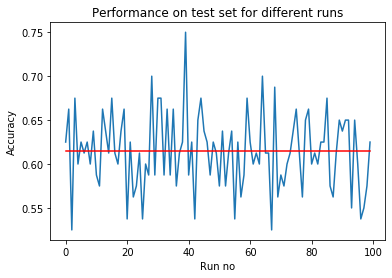

In [33]:
plt.plot(np.arange(len(test_set_acc)), test_set_acc)
plt.plot(np.arange(len(test_set_acc)), np.repeat(avg, len(test_set_acc)), "r")
plt.title('Performance on test set for different runs')
plt.xlabel('Run no')
plt.ylabel('Accuracy')
plt.show()

In [22]:
# optional training at the end, with validation set included
history = model.fit(data[:10*30][:],
                    label[:10*30],
                    epochs=11,
                    batch_size=2)

Epoch 1/11
300/300 [==============================] - 1s 4ms/step - loss: 0.6261 - acc: 0.7167
Epoch 2/11
300/300 [==============================] - 1s 4ms/step - loss: 0.6306 - acc: 0.6733
Epoch 3/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5965 - acc: 0.7100
Epoch 4/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5850 - acc: 0.7433
Epoch 5/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5904 - acc: 0.6900
Epoch 6/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5783 - acc: 0.7267
Epoch 7/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5558 - acc: 0.7133
Epoch 8/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5349 - acc: 0.7567
Epoch 9/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5346 - acc: 0.7367
Epoch 10/11
300/300 [==============================] - 1s 4ms/step - loss: 0.5233 - acc: 0.7600
Epoch 11/11
300/300 [============================

In [23]:
model.evaluate( x_test, y_test)

80/80 [==============================] - 0s 187us/step


[0.6741812705993653, 0.6375]